# Part 1: Data Handling and Exploratory Data Analysis

### Import libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Set some parameters for future plots

In [38]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [39]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Exploratory Data Analysis
## 1. Read in Data

In [40]:
hdb_train = pd.read_csv('./train.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_17088\3320913137.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  hdb_train = pd.read_csv('./train.csv')


## 2. Preview Data

In [93]:
hdb_train.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471      2016-05-01  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598      2012-07-01           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897      2013-07-01      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070      2012-04-01           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632      2017-12-01           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  flat_model lease_commence_date  resale_price  mid_storey  \
0     10 TO 12     Model A          2006-01-01      680000.0          11   
1     07 TO 09    Improved          1987-01-01      665000.0           8   
2     13 TO 15   Apartment          1997-01-01      838000.0          14   
3     01 TO 05     Model A          1992-01-01      550000.0           3   
4     01 TO 03  Simplified          1987-01-01      298000.0           2   

        full_flat_type  floor_area_sqft  price_per_sqft  hdb_age  commercial  \
0       4 ROOM Model A          968.760      701.928238       15       False   
1      5 ROOM Improved         1399.320      475.230826       34       False   
2  EXECUTIVE Apartment         1550.016      540.639580       24       False   
3       4 ROOM Model A         1108.692      496.080066       29        True   
4    4 ROOM Simplified          893.412      333.552717       34       False   

   market_hawker  total_dwelling_units  postal  Latitude   Longitude  \
0          False                   142  382003  1.314299  103.872828   
1          False                   112  570153  1.346086  103.855078   
2          False                    90  651289  1.343867  103.760535   
3          False                    75  570232  1.358245  103.845504   
4          False                    48  760876  1.414745  103.835532   

  planning_area  Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  \
0       Kallang            1094.090418               0.0              0.0   
1        Bishan             866.941448               0.0              1.0   
2   Bukit Batok            1459.579948               0.0              0.0   
3        Bishan             950.175199               0.0              1.0   
4        Yishun             729.771895               0.0              1.0   

   Mall_Within_2km  Hawker_Nearest_Distance  Hawker_Within_500m  \
0              7.0               154.753357                 1.0   
1              3.0               640.151925                 0.0   
2              4.0              1762.082341                 0.0   
3              4.0               726.215262                 0.0   
4              2.0              1540.151439                 0.0   

   Hawker_Within_1km  Hawker_Within_2km  mrt_nearest_distance     mrt_name  \
0                3.0               13.0            330.083069      Kallang   
1                1.0                7.0            903.659703       Bishan   
2                0.0                1.0           1334.251197  Bukit Batok   
3                1.0                9.0            907.453484       Bishan   
4                0.0                1.0            412.343032       Khatib   

   bus_interchange  mrt_interchange  mrt_latitude  mrt_longitude  \
0            False            False      1.311540     103.871731   
1             True             True      1.350580     103.848305   
2             True            False      1.349561     103.749970   
3             True             True      1.350580     103.848305   
4            False            False      1.417131     103.832692   

   bus_stop_nearest_distance  bus_stop_latitude  bus_stop_longitude  \
0                  29.427395           1.314433          103.872600   
1                  58.207761           1.345659          103.855381   
2                 214.747860           1.344064          103.758613   
3                  43.396521           1.358045          103.845169   
4                 129.422752           1.415424   

## 3. Check Data Types

In [41]:
data_types = pd.DataFrame(hdb_train.dtypes, columns = ["Data Type"])

data_types

Data Type
id                    int64
Tranc_YearMonth      object
town                 object
flat_type            object
block                object
...                     ...
sec_sch_name         object
cutoff_point          int64
affiliation           int64
sec_sch_latitude    float64
sec_sch_longitude   float64

[78 rows x 1 columns]

### 3.1 Amend data types

In [43]:
#convert Y/N to 1/0 to convert into bool
hdb_train["commercial"] = hdb_train['commercial'].map({'Y': 1, 'N': 0})
hdb_train["market_hawker"] = hdb_train['market_hawker'].map({'Y': 1, 'N': 0})

In [44]:
# Convert 'Tranc_YearMonth' to datetime
hdb_train['Tranc_YearMonth'] = pd.to_datetime(hdb_train['Tranc_YearMonth'], format='%Y-%m')
hdb_train['lease_commence_date'] = pd.to_datetime(hdb_train['lease_commence_date'], format='%Y')

# Convert 'commercial', 'market_hawker', 'bus_interchange' and 'mrt_interchange' to boolean
hdb_train['bus_interchange'] = hdb_train['bus_interchange'].astype(bool)
hdb_train['mrt_interchange'] = hdb_train['mrt_interchange'].astype(bool)
hdb_train['commercial'] = hdb_train['commercial'].astype(bool)
hdb_train['market_hawker'] = hdb_train['market_hawker'].astype(bool)
# Check result
data_types = pd.DataFrame(hdb_train.dtypes, columns = ["Data Type"])

data_types

Data Type
id                          int64
Tranc_YearMonth    datetime64[ns]
town                       object
flat_type                  object
block                      object
...                           ...
sec_sch_name               object
cutoff_point                int64
affiliation                 int64
sec_sch_latitude          float64
sec_sch_longitude         float64

[78 rows x 1 columns]

In [45]:
hdb_train.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471      2016-05-01  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598      2012-07-01           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897      2013-07-01      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070      2012-04-01           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632      2017-12-01           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A          2006-01-01      680000.0   
1     07 TO 09           130.0    Improved          1987-01-01      665000.0   
2     13 TO 15           144.0   Apartment          1997-01-01      838000.0   
3     01 TO 05           103.0     Model A          1992-01-01      550000.0   
4     01 TO 03            83.0  Simplified          1987-01-01      298000.0   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   
3        2012            4           3      1      5    3   
4        2017           12           2      1      3    2   

        full_flat_type               address  floor_area_sqft  price_per_sqft  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760      701.928238   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320      475.230826   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016      540.639580   
3       4 ROOM Model A     232, BISHAN ST 22         1108.692      496.080066   
4    4 ROOM Simplified     876, YISHUN ST 81          893.412      333.552717   

   hdb_age  max_floor_lvl  year_completed residential  commercial  \
0       15             25            2005           Y       False   
1       34              9            1987           Y       False   
2       24             16            1996           Y       False   
3       29             11            1990           Y        True   
4       34              4            1987           Y       False   

   market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0          False                   N                 N                   142   
1          False                   N                 N                   112   
2          False                   N                 N                    90   
3          False                   N                 N                    75   
4          False                   N                 N                    48   

   1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
0           0           0           0          96          46          0   
1           0           0           0          56          56          0   
2           0           0           0           0          30         60   
3           0           0           0          68           7          0   
4           0           0           0          30          18          0   

   multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
0              0                      0             0             0   
1              0                      0             0             0   
2              0                      0             0             0   
3              0                      0             0             0   
4              0                      0             0             0   

   3room_rental  other_room_rental  postal  Latitude   Longitude  \
0             0                  0  382003  1.314299  103.872828   
1             0                  0  570153  1.346086  103.855078   
2             0                  0  651289  1.343867  103.760535   
3             0                  0  570232  1.358245  103.845504   
4             0                  0  760876  1.414745  103.835532 

### Drop some columns that are not necessary

In [46]:
#drop columns that are deemed not necessary
drop_cols = ["Tranc_Year", "Tranc_Month", "lower", "upper", "mid", "address", "floor_area_sqm", "max_floor_lvl", "year_completed", "residential", "multistorey_carpark", "precinct_pavilion", "1room_sold", "2room_sold", "3room_sold",
             "4room_sold", "5room_sold", "exec_sold", "multigen_sold", "studio_apartment_sold", "1room_rental", "2room_rental", "3room_rental", "other_room_rental", "hawker_food_stalls", "hawker_market_stalls", "bus_stop_name", "vacancy", 
             "pri_sch_affiliation", "cutoff_point", "affiliation"]
hdb_train = hdb_train.drop(columns= drop_cols, axis = 1)

In [47]:
#no. of columns dropped
len(drop_cols)

31

In [48]:
#preview
hdb_train.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471      2016-05-01  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598      2012-07-01           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897      2013-07-01      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070      2012-04-01           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632      2017-12-01           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  flat_model lease_commence_date  resale_price  mid_storey  \
0     10 TO 12     Model A          2006-01-01      680000.0          11   
1     07 TO 09    Improved          1987-01-01      665000.0           8   
2     13 TO 15   Apartment          1997-01-01      838000.0          14   
3     01 TO 05     Model A          1992-01-01      550000.0           3   
4     01 TO 03  Simplified          1987-01-01      298000.0           2   

        full_flat_type  floor_area_sqft  price_per_sqft  hdb_age  commercial  \
0       4 ROOM Model A          968.760      701.928238       15       False   
1      5 ROOM Improved         1399.320      475.230826       34       False   
2  EXECUTIVE Apartment         1550.016      540.639580       24       False   
3       4 ROOM Model A         1108.692      496.080066       29        True   
4    4 ROOM Simplified          893.412      333.552717       34       False   

   market_hawker  total_dwelling_units  postal  Latitude   Longitude  \
0          False                   142  382003  1.314299  103.872828   
1          False                   112  570153  1.346086  103.855078   
2          False                    90  651289  1.343867  103.760535   
3          False                    75  570232  1.358245  103.845504   
4          False                    48  760876  1.414745  103.835532   

  planning_area  Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  \
0       Kallang            1094.090418               NaN              NaN   
1        Bishan             866.941448               NaN              1.0   
2   Bukit Batok            1459.579948               NaN              NaN   
3        Bishan             950.175199               NaN              1.0   
4        Yishun             729.771895               NaN              1.0   

   Mall_Within_2km  Hawker_Nearest_Distance  Hawker_Within_500m  \
0              7.0               154.753357                 1.0   
1              3.0               640.151925                 NaN   
2              4.0              1762.082341                 NaN   
3              4.0               726.215262                 NaN   
4              2.0              1540.151439                 NaN   

   Hawker_Within_1km  Hawker_Within_2km  mrt_nearest_distance     mrt_name  \
0                3.0               13.0            330.083069      Kallang   
1                1.0                7.0            903.659703       Bishan   
2                NaN                1.0           1334.251197  Bukit Batok   
3                1.0                9.0            907.453484       Bishan   
4                NaN                1.0            412.343032       Khatib   

   bus_interchange  mrt_interchange  mrt_latitude  mrt_longitude  \
0            False            False      1.311540     103.871731   
1             True             True      1.350580     103.848305   
2             True            False      1.349561     103.749970   
3             True             True      1.350580     103.848305   
4            False            False      1.417131     103.832692   

   bus_stop_nearest_distance  bus_stop_latitude  bus_stop_longitude  \
0                  29.427395           1.314433          103.872600   
1                  58.207761           1.345659          103.855381   
2                 214.747860           1.344064          103.758613   
3                  43.396521           1.358045          103.845169   
4                 129.422752           1.415424   

In [49]:
#show no. of rows and columns
print(f'There are {hdb_train.shape[0]} rows and {hdb_train.shape[1]} columns')

There are 150634 rows and 47 columns


## 4. Check for Nulls

In [50]:
#check for cols with null values.
hdb_train.isna().sum().sort_values(ascending = False)

Hawker_Within_500m           97390
Mall_Within_500m             92789
Hawker_Within_1km            60868
Hawker_Within_2km            29202
Mall_Within_1km              25426
Mall_Within_2km               1940
Mall_Nearest_Distance          829
flat_model                       0
id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
hdb_age                          0
price_per_sqft                   0
floor_area_sqft                  0
full_flat_type                   0
mid_storey                       0
resale_price                     0
lease_commence_date              0
commercial                       0
planning_area                    0
Longitude                        0
Latitude                         0
postal                           0
market_hawker                    0
total_dwelling_units

In [51]:
cols = ['Hawker_Within_500m', 'Mall_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km',
           'Mall_Within_1km', 'Mall_Within_2km']
#impute nulls except for Mall_Nearest_Distance with 0
for col in cols:
    hdb_train[col].fillna(0,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17088\214347678.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hdb_train[col].fillna(0,inplace=True)


In [52]:
#validate nulls have been imputed

hdb_train.isna().sum().sort_values(ascending = False)

Mall_Nearest_Distance        829
Tranc_YearMonth                0
id                             0
flat_type                      0
block                          0
street_name                    0
town                           0
flat_model                     0
lease_commence_date            0
resale_price                   0
mid_storey                     0
full_flat_type                 0
floor_area_sqft                0
price_per_sqft                 0
storey_range                   0
hdb_age                        0
commercial                     0
total_dwelling_units           0
market_hawker                  0
postal                         0
Latitude                       0
Longitude                      0
planning_area                  0
Mall_Within_500m               0
Mall_Within_1km                0
Mall_Within_2km                0
Hawker_Nearest_Distance        0
Hawker_Within_500m             0
Hawker_Within_1km              0
Hawker_Within_2km              0
mrt_neares

## 5. Descriptive Statistics

In [ ]:
hdb_train.describe()

id                Tranc_YearMonth  \
count  150634.000000                         150634   
mean    93047.887496  2016-12-14 08:10:49.670061056   
min         1.000000            2012-03-01 00:00:00   
25%     46469.250000            2014-08-01 00:00:00   
50%     93077.500000            2017-03-01 00:00:00   
75%    139574.750000            2019-05-01 00:00:00   
max    185966.000000            2021-04-01 00:00:00   
std     53679.906247                            NaN   

                 lease_commence_date  resale_price     mid_storey  \
count                         150634  1.506340e+05  150634.000000   
mean   1992-06-13 04:06:10.147509888  4.491615e+05       8.284823   
min              1966-01-01 00:00:00  1.500000e+05       2.000000   
25%              1984-01-01 00:00:00  3.470000e+05       5.000000   
50%              1992-01-01 00:00:00  4.200000e+05       8.000000   
75%              2001-01-01 00:00:00  5.200000e+05      11.000000   
max              2019-01-01 00:00:00  1.258000e+06      50.000000   
std                              NaN  1.433076e+05       5.508074   

       floor_area_sqft  price_per_sqft        hdb_age  total_dwelling_units  \
count    150634.000000   150634.000000  150634.000000         150634.000000   
mean       1046.235290      434.130280      28.551536            124.683312   
min         333.684000      205.108901       2.000000              2.000000   
25%         807.300000      364.973191      20.000000             90.000000   
50%        1022.580000      412.001357      29.000000            112.000000   
75%        1205.568000      474.056088      37.000000            144.000000   
max        3013.920000     1185.640706      55.000000            570.000000   
std         262.674321      104.797180      12.138829             58.349670   

            Latitude      Longitude  Mall_Nearest_Distance  Mall_Within_500m  \
count  150634.000000  150634.000000          149805.000000     150634.000000   
mean        1.366224     103.839391             664.239826          0.487400   
min         1.270380     103.685228               0.000000          0.000000   
25%         1.336285     103.774859             391.473823          0.000000   
50%         1.363466     103.844907             602.818388          0.000000   
75%         1.393323     103.898808             868.818288          1.000000   
max         1.457071     103.987804            3496.402910          6.000000   
std         0.042850       0.072506             368.739209          0.728508   

       Mall_Within_1km  Mall_Within_2km  Hawker_Nearest_Distance  \
count    150634.000000    150634.000000            150634.000000   
mean          1.786781         5.169046              1173.700148   
min           0.000000         0.000000                 1.873295   
25%           1.000000         3.000000               372.132398   
50%           2.000000         5.000000               778.966980   
75%           3.000000         6.000000              1678.949229   
max          15.000000        43.000000              4907.036414   
std           1.423342         3.481453              1076.701337   

       Hawker_Within_500m  Hawker_Within_1km  Hawker_Within_2km  \
count       150634.000000      150634.000000      150634.000000   
mean             0.488728           1.405639           3.792178   
min              0.000000           0.000000           0.000000   
25%              0.000000           0.000000           1.000000   
50%              0.000000           1.000000           2.000000   
75%              1.000000           2.000000           7.000000   
max              5.000000           9.000000          19.000000   
std              0.766323           1.710041           4.009034   

       mrt_nearest_distance   mrt_latitude  mrt_longitude  \
count         150634.000000  150634.000000  150634.000000   
mean             765.007872       1.365667     103.839400   
min               21.971410       1.265982     103.697143   
25%   

In [54]:
#descriptive statistics for categorical columns
hdb_train.describe(include='object')

town flat_type   block     street_name storey_range flat_model  \
count        150634    150634  150634          150634       150634     150634   
unique           26         7    2514             553           25         20   
top     JURONG WEST    4 ROOM       2  YISHUN RING RD     04 TO 06    Model A   
freq          11451     61136     579            2451        34699      46261   

        full_flat_type  postal planning_area mrt_name  \
count           150634  150634        150634   150634   
unique              43   17483            32       94   
top     4 ROOM Model A  142091   Jurong West  Punggol   
freq             35127      80         11451     7671   

                    pri_sch_name                sec_sch_name  
count                     150634                      150634  
unique                       177                         134  
top     Marsiling Primary School  Bendemeer Secondary School  
freq                        2075                        3384

## 6. Check unique values

In [55]:
#check unique counts
hdb_train.nunique()

id                           150634
Tranc_YearMonth                 110
town                             26
flat_type                         7
block                          2514
street_name                     553
storey_range                     25
flat_model                       20
lease_commence_date              54
resale_price                   3295
mid_storey                       22
full_flat_type                   43
floor_area_sqft                 169
price_per_sqft                24966
hdb_age                          54
commercial                        2
market_hawker                     2
total_dwelling_units            320
postal                        17483
Latitude                       9126
Longitude                      9098
planning_area                    32
Mall_Nearest_Distance          8982
Mall_Within_500m                  7
Mall_Within_1km                  16
Mall_Within_2km                  42
Hawker_Nearest_Distance        9126
Hawker_Within_500m          

## 7. check duplicate values

In [56]:
#check for duplicated rows
hdb_train.duplicated().sum()

np.int64(0)

In [57]:
hdb_num_cols = hdb_train.select_dtypes(include = "number").columns.to_list()

In [58]:
hdb_num_cols.remove('id')

In [59]:
hdb_num_cols

['resale_price',
 'mid_storey',
 'floor_area_sqft',
 'price_per_sqft',
 'hdb_age',
 'total_dwelling_units',
 'Latitude',
 'Longitude',
 'Mall_Nearest_Distance',
 'Mall_Within_500m',
 'Mall_Within_1km',
 'Mall_Within_2km',
 'Hawker_Nearest_Distance',
 'Hawker_Within_500m',
 'Hawker_Within_1km',
 'Hawker_Within_2km',
 'mrt_nearest_distance',
 'mrt_latitude',
 'mrt_longitude',
 'bus_stop_nearest_distance',
 'bus_stop_latitude',
 'bus_stop_longitude',
 'pri_sch_nearest_distance',
 'pri_sch_latitude',
 'pri_sch_longitude',
 'sec_sch_nearest_dist',
 'sec_sch_latitude',
 'sec_sch_longitude']

## 8. Analyse outliers

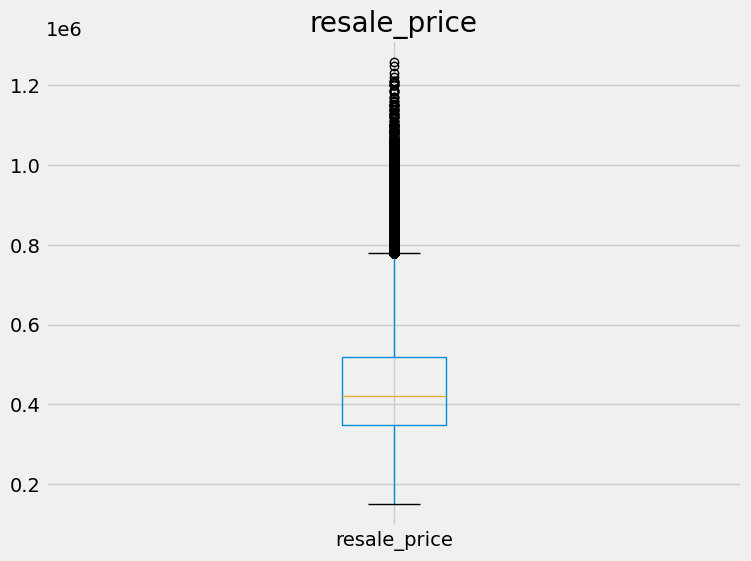

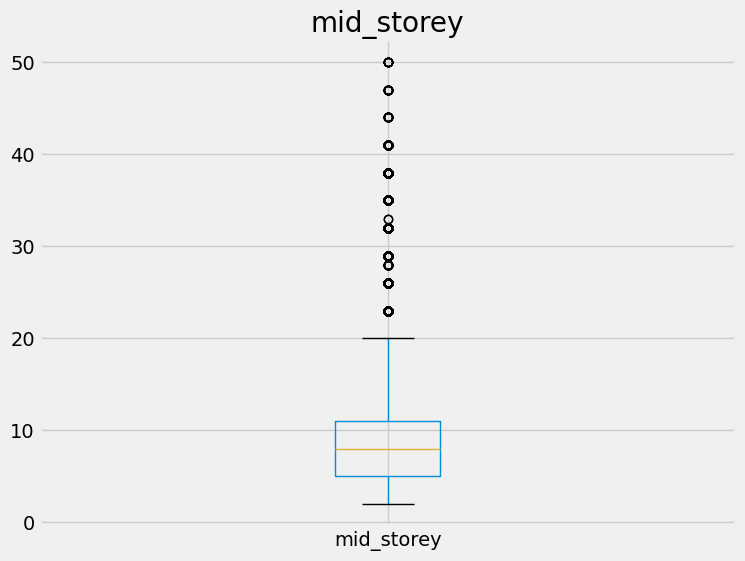

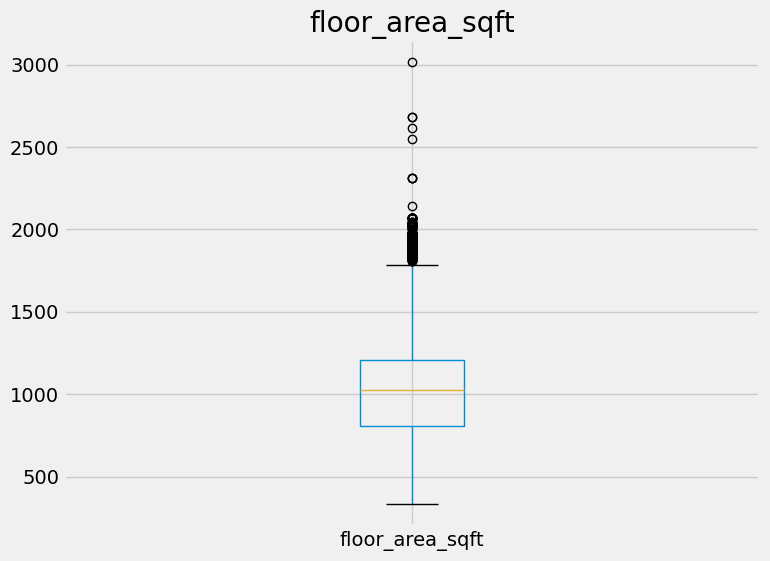

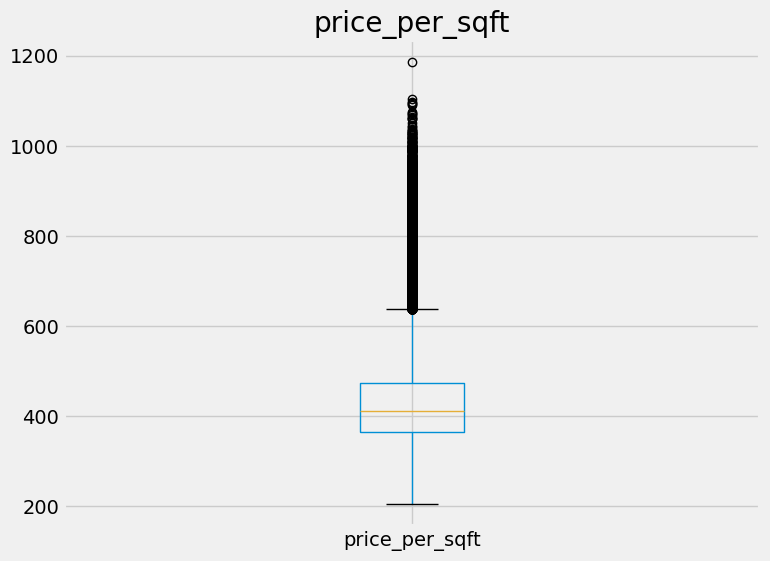

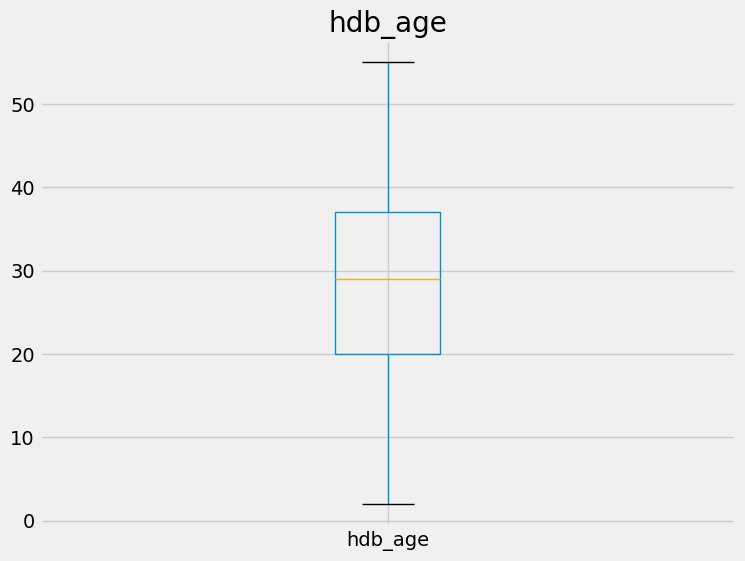

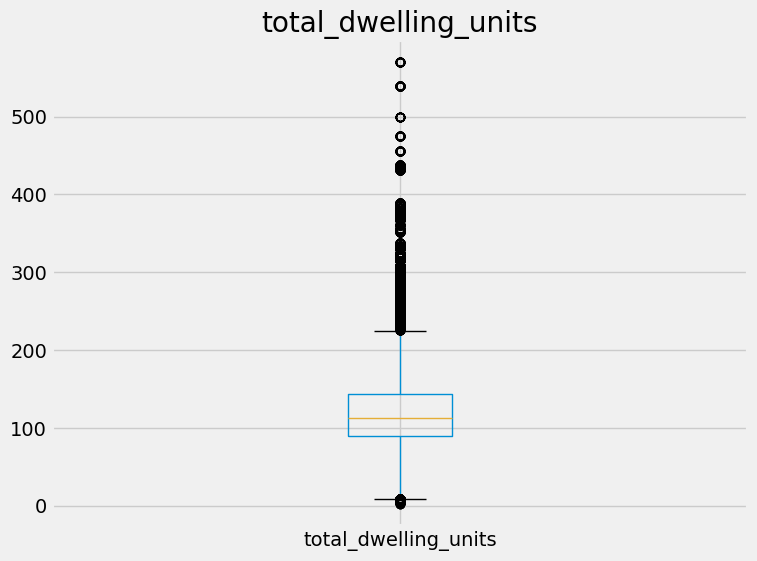

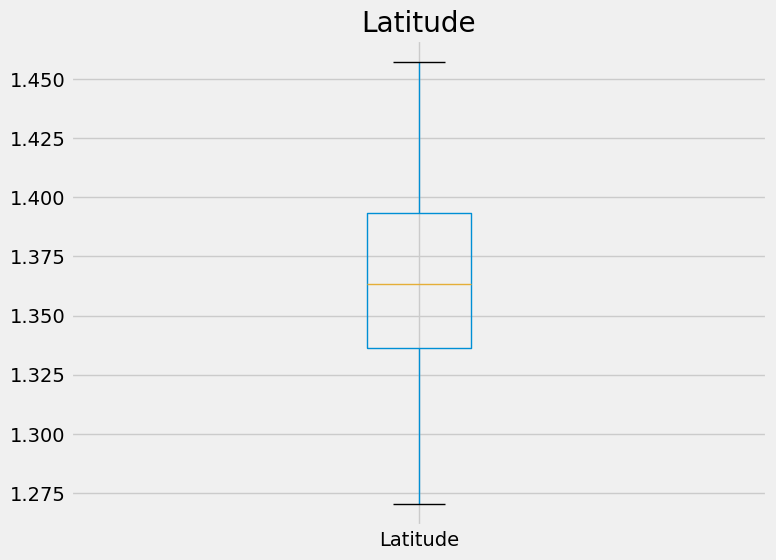

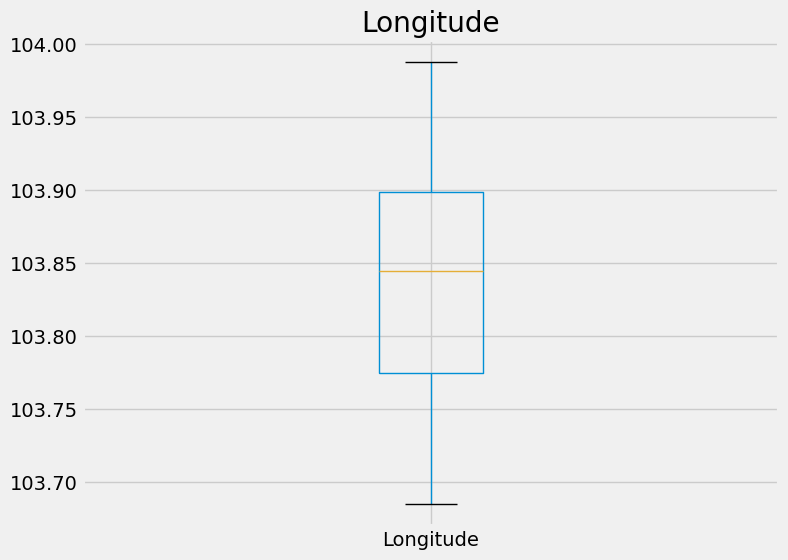

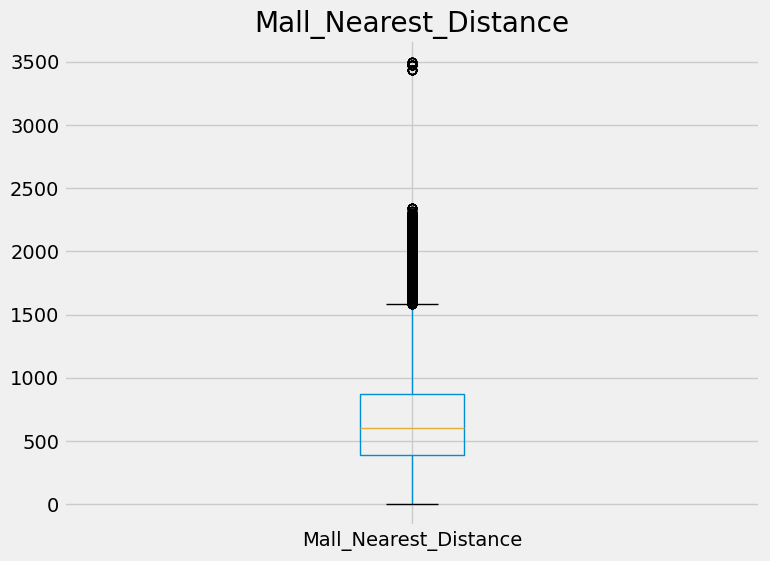

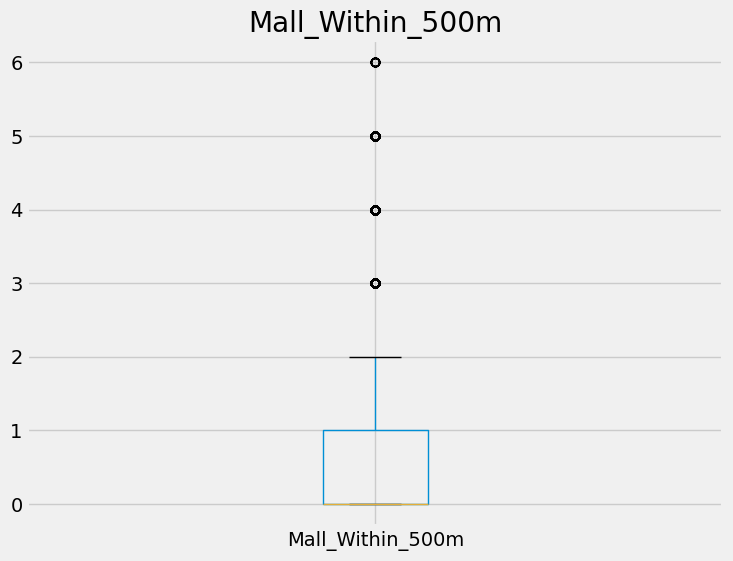

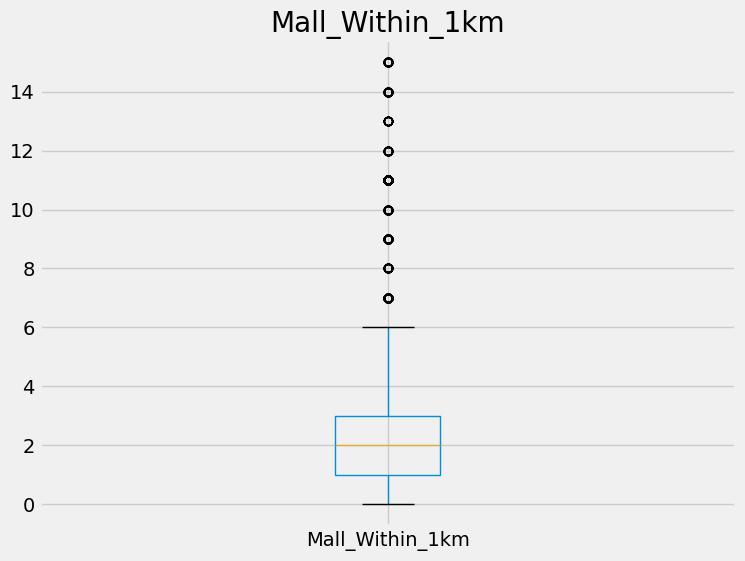

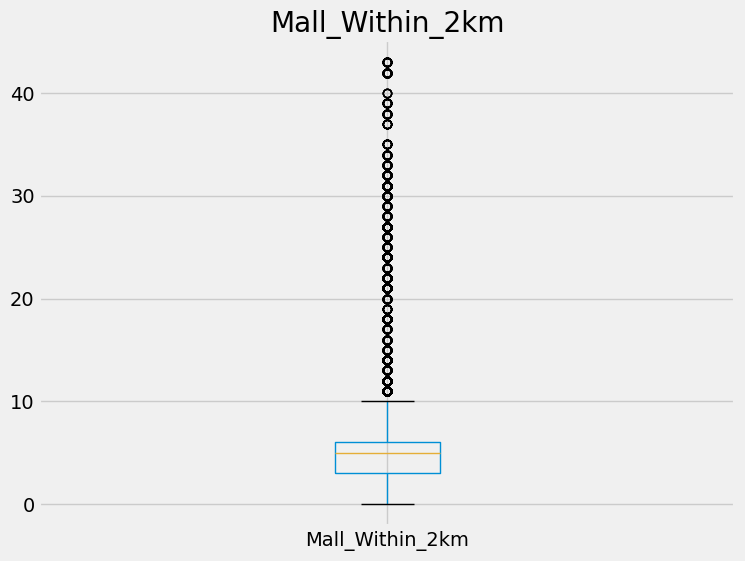

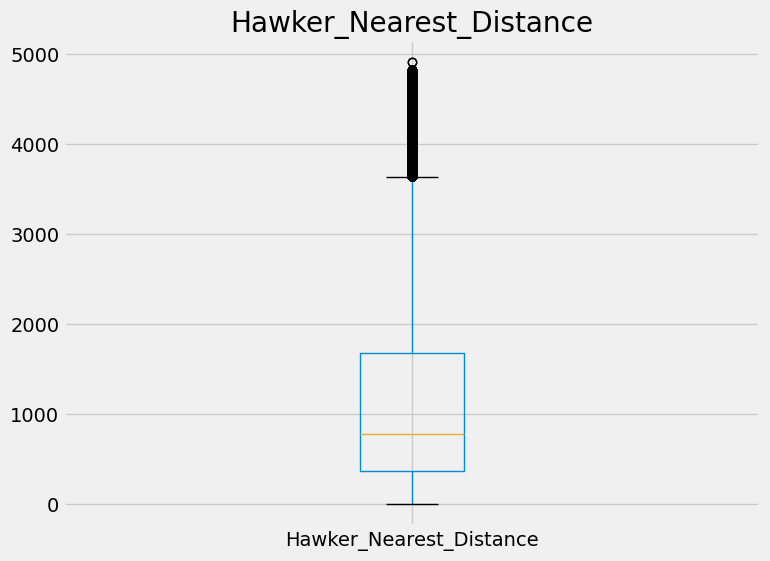

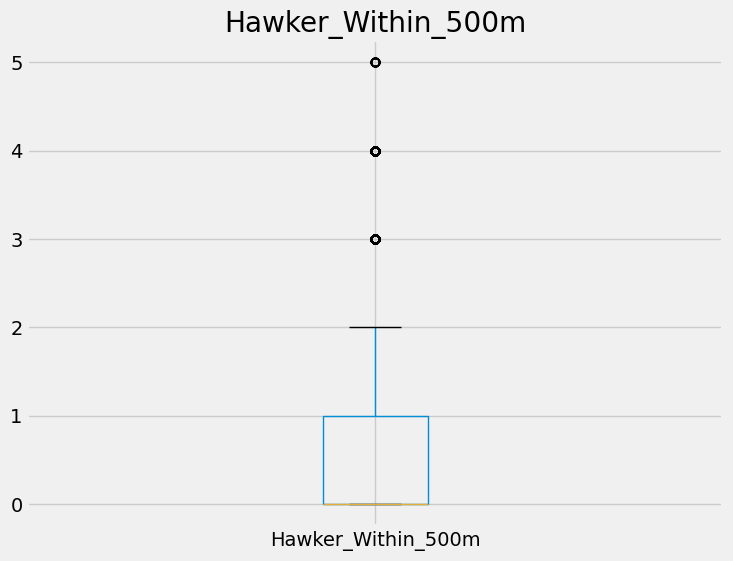

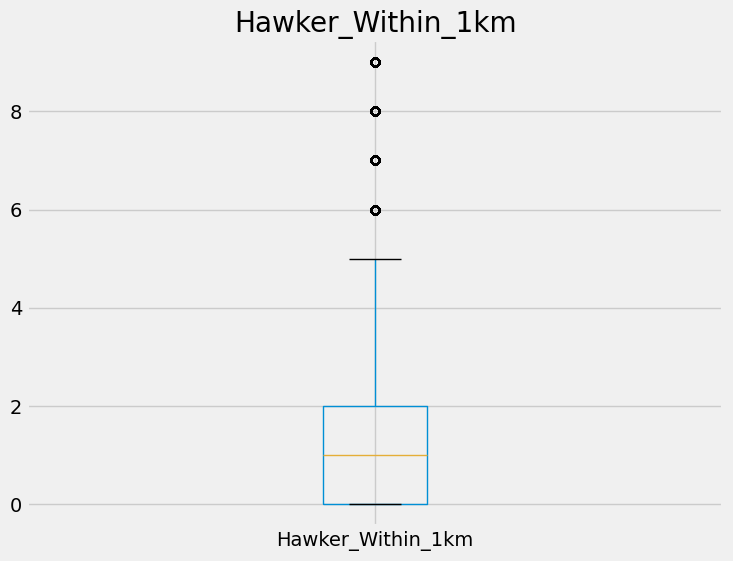

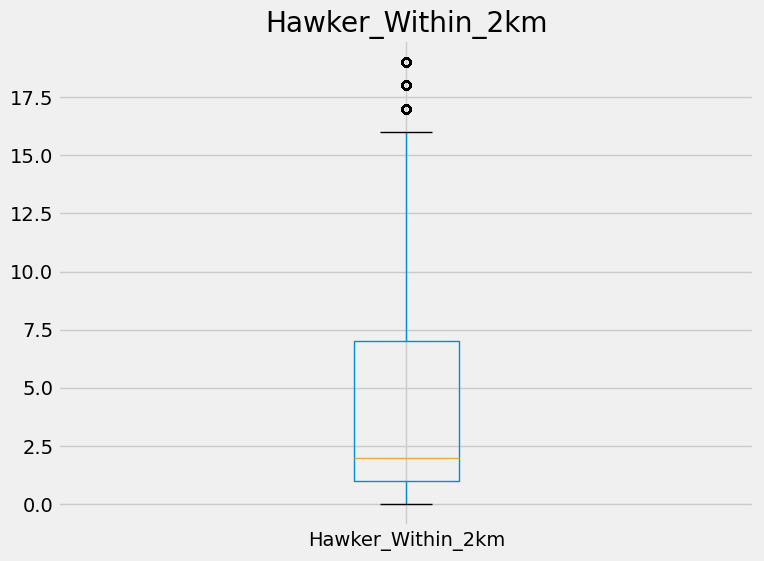

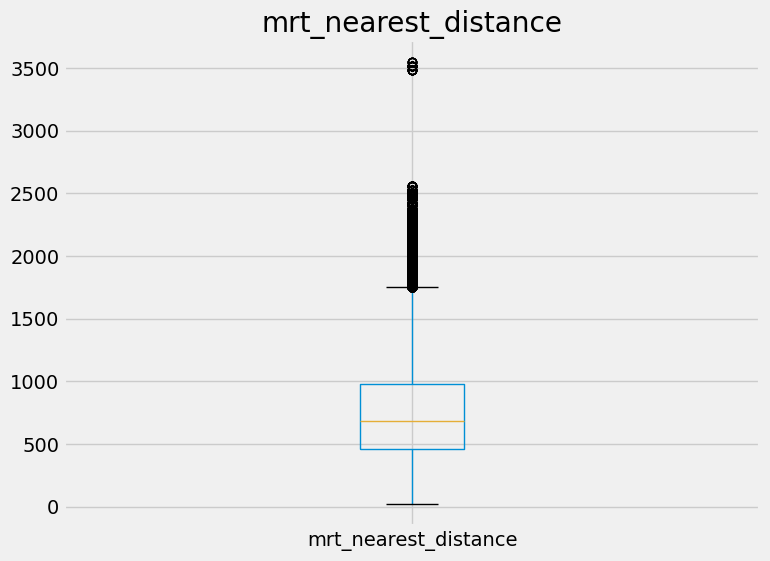

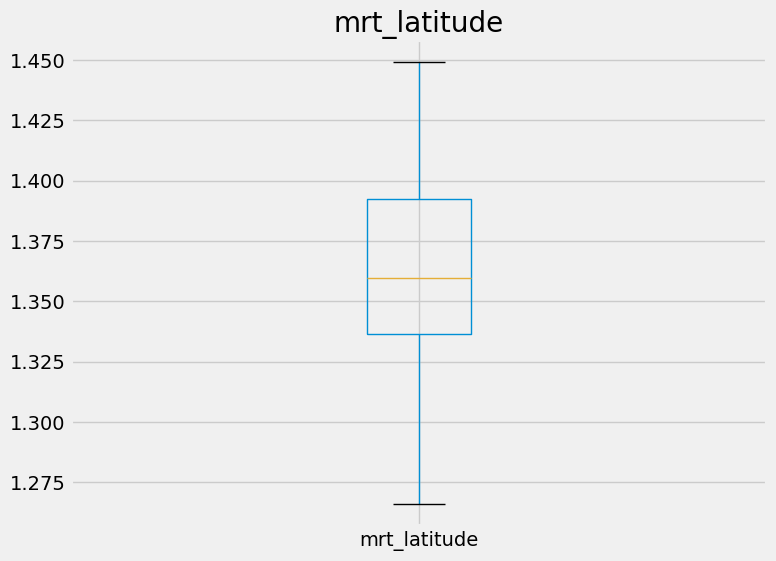

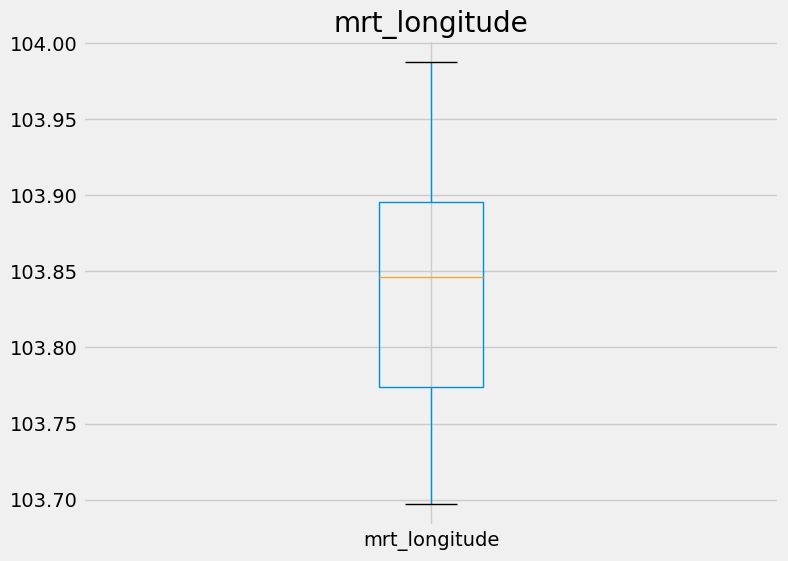

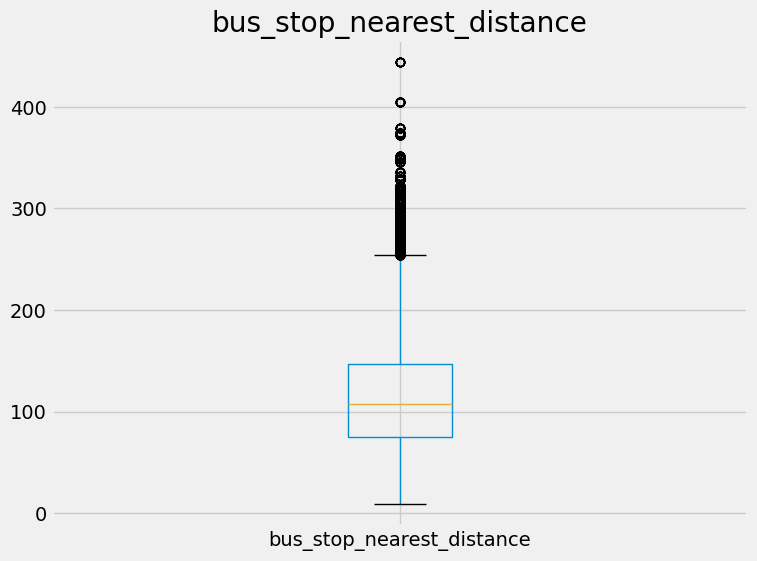

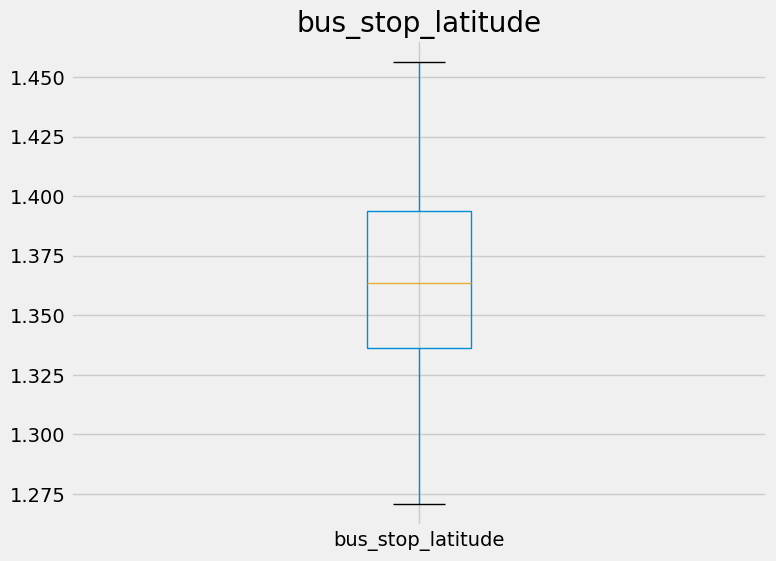

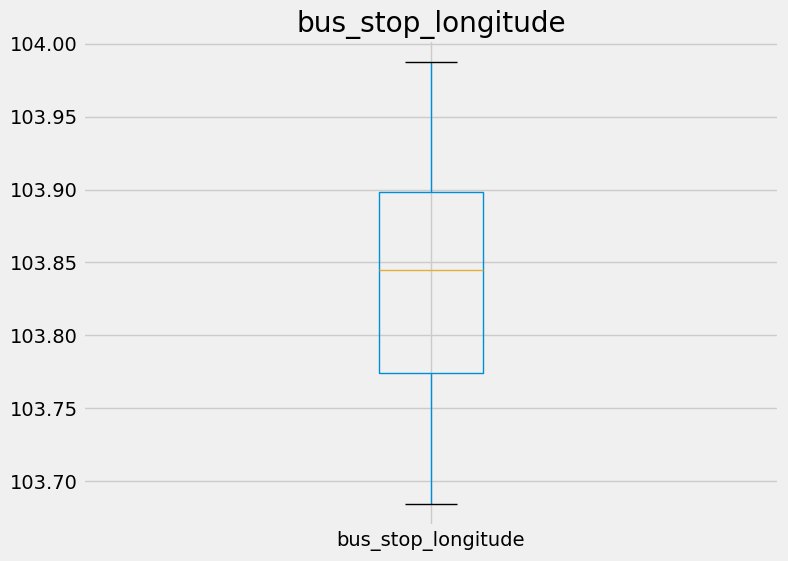

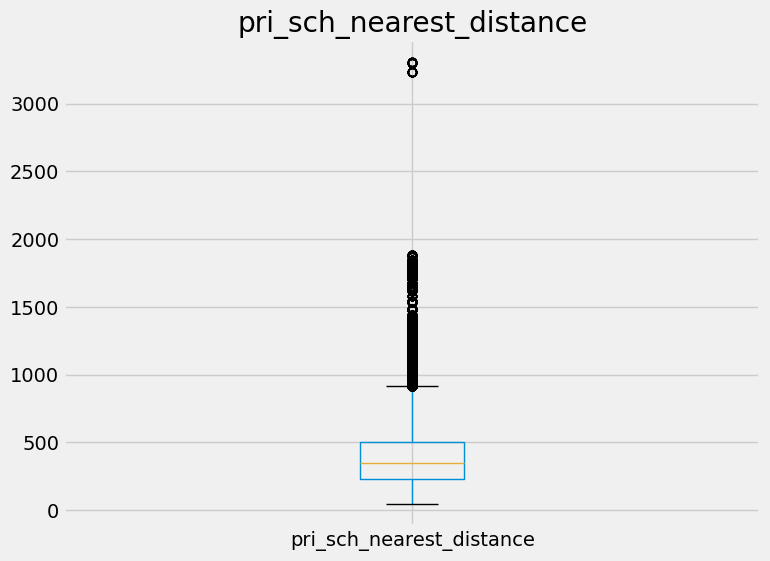

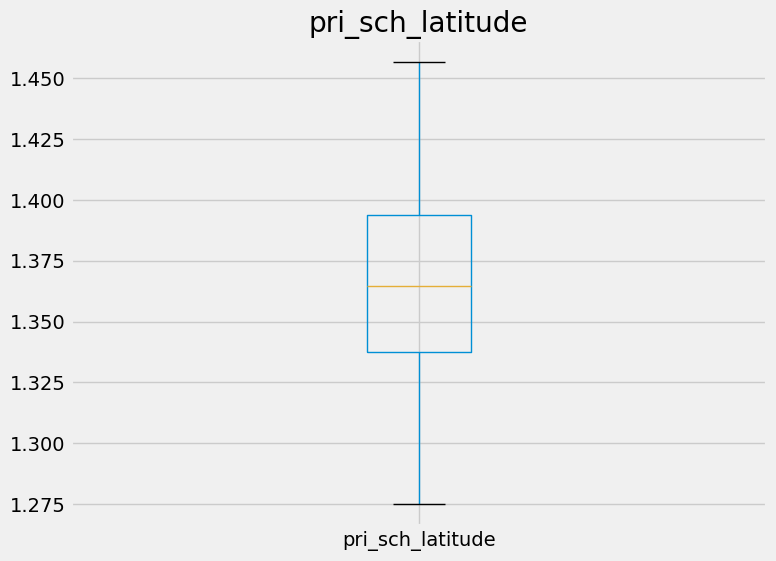

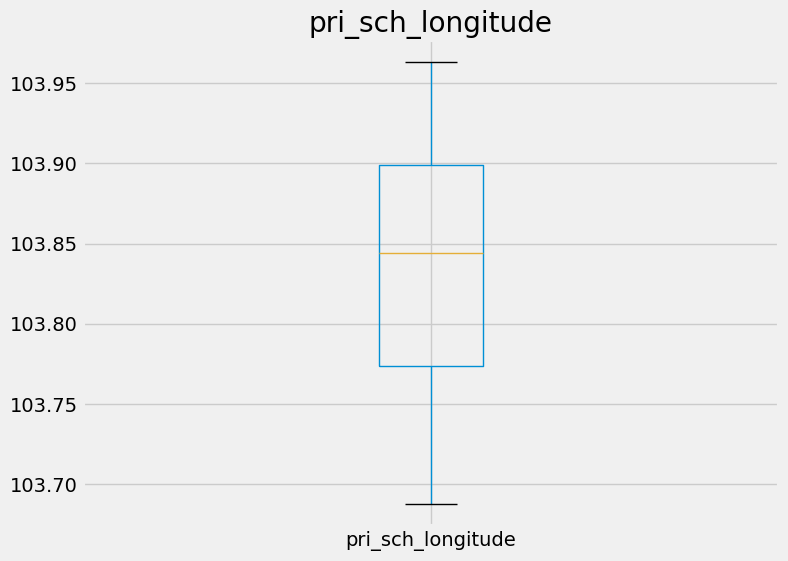

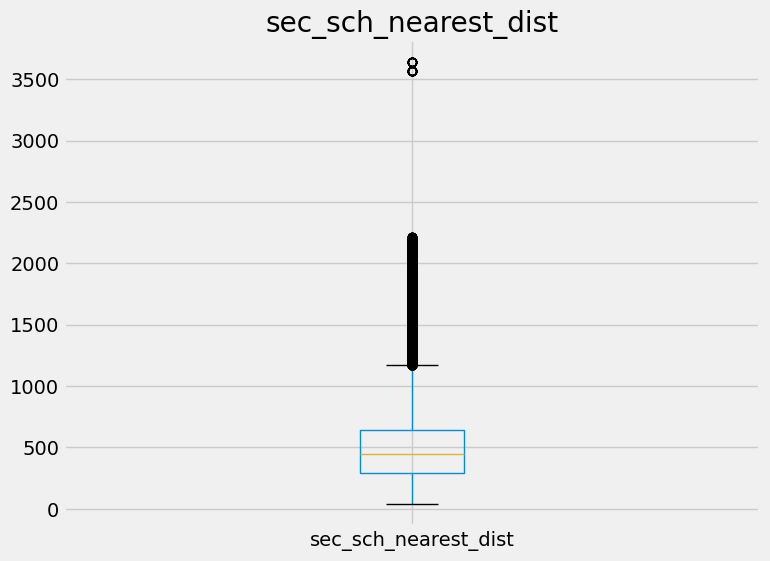

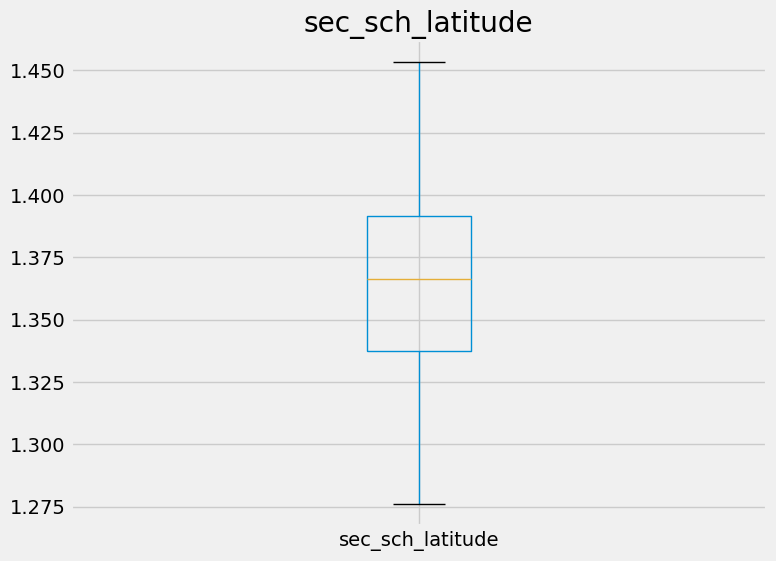

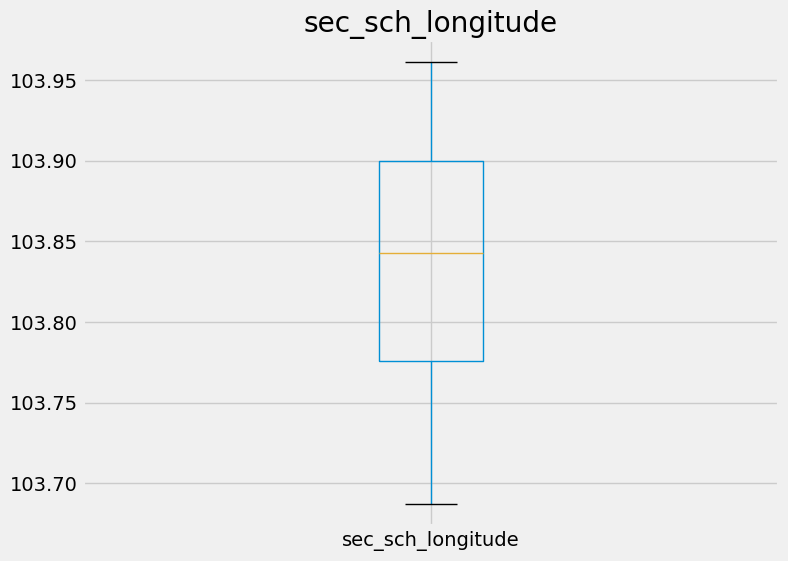

In [60]:
#boxplot for all numeric columns to understand outliers.
for col in hdb_num_cols:
    hdb_train.boxplot(column=col)
    plt.title(col)
    plt.show()

In [61]:
#check no. of outliers
hdb_num_cols

for col in hdb_num_cols:
    Q1 = hdb_train[col].quantile(0.25)
    Q3 = hdb_train[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = hdb_train[(hdb_train[col] < Q1 - 1.5*IQR) | (hdb_train[col] > Q3 + 1.5* IQR)].shape[0]
    print(f'{col}: {outliers} outliers')

    #leave outliers, to maybe revisit if accuracy is low.

resale_price: 5220 outliers
mid_storey: 4173 outliers
floor_area_sqft: 465 outliers
price_per_sqft: 8416 outliers
hdb_age: 0 outliers
total_dwelling_units: 8935 outliers
Latitude: 0 outliers
Longitude: 0 outliers
Mall_Nearest_Distance: 3055 outliers
Mall_Within_500m: 3556 outliers
Mall_Within_1km: 553 outliers
Mall_Within_2km: 5369 outliers
Hawker_Nearest_Distance: 8076 outliers
Hawker_Within_500m: 3531 outliers
Hawker_Within_1km: 4025 outliers
Hawker_Within_2km: 822 outliers
mrt_nearest_distance: 5270 outliers
mrt_latitude: 0 outliers
mrt_longitude: 0 outliers
bus_stop_nearest_distance: 2955 outliers
bus_stop_latitude: 0 outliers
bus_stop_longitude: 0 outliers
pri_sch_nearest_distance: 4291 outliers
pri_sch_latitude: 0 outliers
pri_sch_longitude: 0 outliers
sec_sch_nearest_dist: 5891 outliers
sec_sch_latitude: 0 outliers
sec_sch_longitude: 0 outliers


## 9. Analyse Correlation

In [62]:
#overview of correlation
hdb_train.select_dtypes(include = "number").corr()

id  resale_price  mid_storey  \
id                         1.000000      0.521504    0.058212   
resale_price               0.521504      1.000000    0.353213   
mid_storey                 0.058212      0.353213    1.000000   
floor_area_sqft            0.757312      0.654120    0.023855   
price_per_sqft            -0.109618      0.606288    0.437975   
hdb_age                   -0.377854     -0.350337   -0.265112   
total_dwelling_units      -0.471778     -0.140725    0.216576   
Latitude                   0.224330     -0.216153   -0.110286   
Longitude                  0.011081      0.106596   -0.035876   
Mall_Nearest_Distance     -0.130739     -0.087096   -0.069906   
Mall_Within_500m           0.065098      0.085151    0.040571   
Mall_Within_1km            0.033991      0.078815    0.056196   
Mall_Within_2km           -0.034237      0.108648    0.093654   
Hawker_Nearest_Distance    0.266898     -0.014537    0.031928   
Hawker_Within_500m        -0.309549      0.012637    0.070915   
Hawker_Within_1km         -0.330248      0.090516    0.103312   
Hawker_Within_2km         -0.302384      0.183168    0.110475   
mrt_nearest_distance       0.079209     -0.128222    0.029442   
mrt_latitude               0.220529     -0.214939   -0.109404   
mrt_longitude              0.008884      0.106506   -0.032624   
bus_stop_nearest_distance -0.003138      0.031940    0.010943   
bus_stop_latitude          0.224484     -0.215760   -0.110066   
bus_stop_longitude         0.010991      0.106394   -0.036073   
pri_sch_nearest_distance  -0.110015     -0.011004    0.016034   
pri_sch_latitude           0.227760     -0.214707   -0.109133   
pri_sch_longitude          0.011999      0.106681   -0.036845   
sec_sch_nearest_dist      -0.047901      0.095339    0.065021   
sec_sch_latitude           0.221602     -0.216303   -0.108582   
sec_sch_longitude          0.013421      0.108911   -0.036176   

                           floor_area_sqft  price_per_sqft   hdb_age  \
id                                0.757312       -0.109618 -0.377854   
resale_price                      0.654120        0.606288 -0.350337   
mid_storey                        0.023855        0.437975 -0.265112   
floor_area_sqft                   1.000000       -0.183124 -0.283182   
price_per_sqft                   -0.183124        1.000000 -0.174912   
hdb_age                          -0.283182       -0.174912  1.000000   
total_dwelling_units             -0.434511        0.272737  0.154468   
Latitude                          0.214800       -0.509596 -0.360358   
Longitude                        -0.012033        0.142068  0.007462   
Mall_Nearest_Distance            -0.106064       -0.022218  0.264398   
Mall_Within_500m                  0.067526        0.061310 -0.073281   
Mall_Within_1km                   0.041818        0.079946 -0.066120   
Mall_Within_2km                  -0.060319        0.233085 -0.000668   
Hawker_Nearest_Distance           0.206886       -0.225440 -0.503202   
Hawker_Within_500m               -0.312530        0.343496  0.377420   
Hawker_Within_1km                -0.328017        0.463077  0.412577   
Hawker_Within_2km                -0.292913        0.542975  0.407918   
mrt_nearest_distance              0.053186       -0.229846 -0.154657   
mrt_latitude                      0.208544       -0.501719 -0.356519   
mrt_longitude                    -0.013885        0.143663  0.007962   
bus_stop_nearest_distance         0.006461        0.033045  0.034772   
bus_stop_latitude                 0.214928       -0.509218 -0.360586   
bus_stop_longitude               -0.012127        0.141898  0.007886   
pri_sch_nearest_distance         -0.113645        0.098350  0.181359   
pri_sch_latitude                  0.217131       -0.510011 -0.366473   
pri_sch_longitude                -0.009764        0.140042  0.009005   
sec_sch_nearest_dist             -0.063315        0.203794  0.070921   
sec_sch_latitude                  0.213272       -0.508331 -0.3562

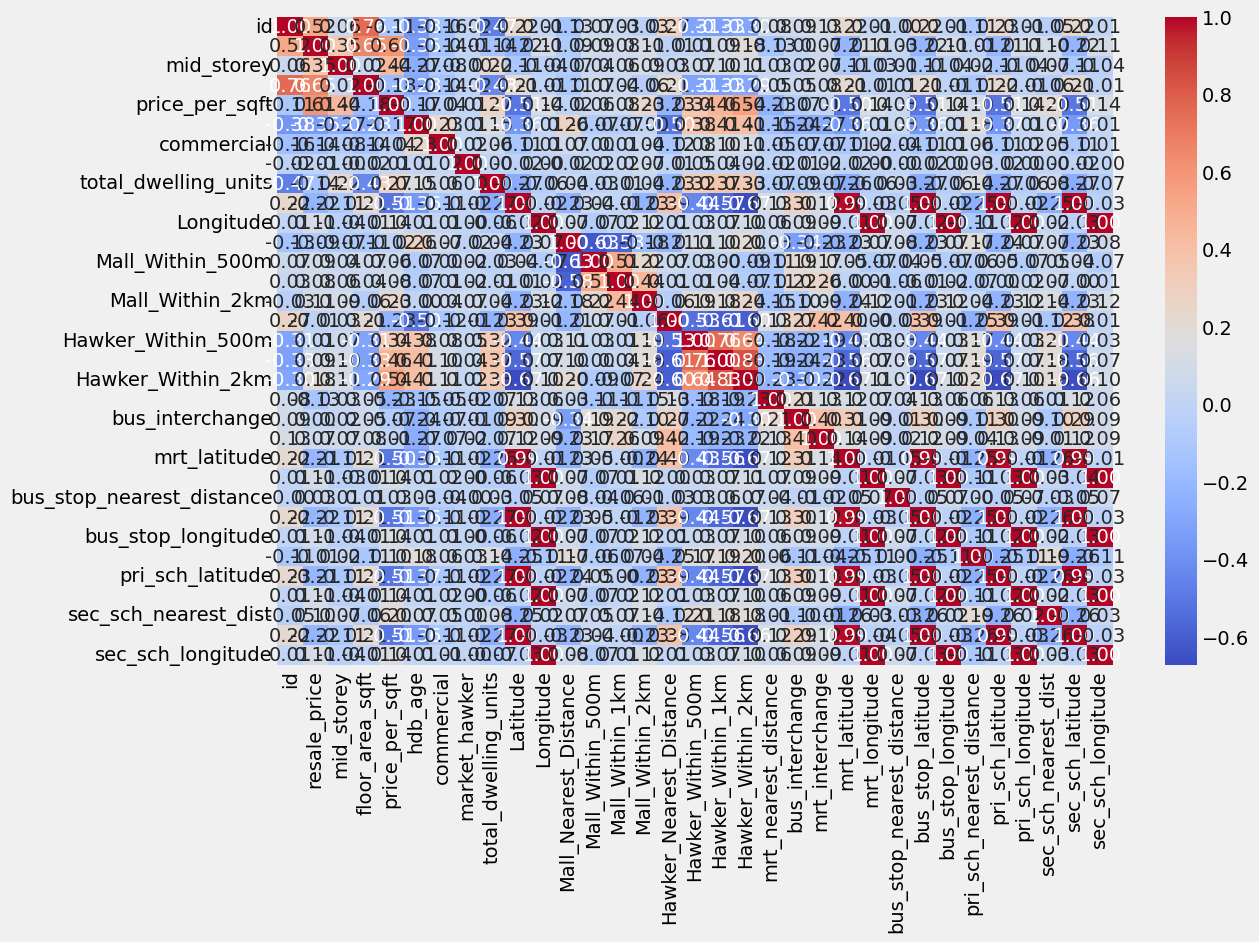

In [63]:
plt.figure(figsize=(12, 8))
sns.heatmap(hdb_train.corr(numeric_only=True), fmt='.2f', cmap='coolwarm', annot=True)
plt.show()

In [64]:
#wow too much. drop and then replot: 
col_drop = ['id', 'Longitude', 'Latitude', 'pri_sch_longitude', 'pri_sch_latitude', 'sec_sch_latitude', 'sec_sch_longitude', 'bus_stop_latitude', 'bus_stop_longitude', 'mrt_latitude', 'mrt_longitude',
'Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km']

corr_test = hdb_train.drop(columns=col_drop, axis = 1)

corr_test.head()


Tranc_YearMonth             town  flat_type block       street_name  \
0      2016-05-01  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1      2012-07-01           BISHAN     5 ROOM   153      BISHAN ST 13   
2      2013-07-01      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3      2012-04-01           BISHAN     4 ROOM   232      BISHAN ST 22   
4      2017-12-01           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  flat_model lease_commence_date  resale_price  mid_storey  \
0     10 TO 12     Model A          2006-01-01      680000.0          11   
1     07 TO 09    Improved          1987-01-01      665000.0           8   
2     13 TO 15   Apartment          1997-01-01      838000.0          14   
3     01 TO 05     Model A          1992-01-01      550000.0           3   
4     01 TO 03  Simplified          1987-01-01      298000.0           2   

        full_flat_type  floor_area_sqft  price_per_sqft  hdb_age  commercial  \
0       4 ROOM Model A          968.760      701.928238       15       False   
1      5 ROOM Improved         1399.320      475.230826       34       False   
2  EXECUTIVE Apartment         1550.016      540.639580       24       False   
3       4 ROOM Model A         1108.692      496.080066       29        True   
4    4 ROOM Simplified          893.412      333.552717       34       False   

   market_hawker  total_dwelling_units  postal planning_area  \
0          False                   142  382003       Kallang   
1          False                   112  570153        Bishan   
2          False                    90  651289   Bukit Batok   
3          False                    75  570232        Bishan   
4          False                    48  760876        Yishun   

   Mall_Nearest_Distance  Hawker_Nearest_Distance  mrt_nearest_distance  \
0            1094.090418               154.753357            330.083069   
1             866.941448               640.151925            903.659703   
2            1459.579948              1762.082341           1334.251197   
3             950.175199               726.215262            907.453484   
4             729.771895              1540.151439            412.343032   

      mrt_name  bus_interchange  mrt_interchange  bus_stop_nearest_distance  \
0      Kallang            False            False                  29.427395   
1       Bishan             True             True                  58.207761   
2  Bukit Batok             True            False                 214.747860   
3       Bishan             True             True                  43.396521   
4       Khatib            False            False                 129.422752   

   pri_sch_nearest_distance                           pri_sch_name  \
0               1138.633422               Geylang Methodist School   
1                415.607357  Kuo Chuan Presbyterian Primary School   
2                498.849039                  Keming Primary School   
3                389.515528                   Catholic High School   
4                401.200584              Naval Base Primary School   

   sec_sch_nearest_dist                             sec_sch_name  
0           1138.633422                 Geylang Methodist School  
1            447.894399  Kuo Chuan Presbyterian Secondary School  
2            180.074558             Yusof Ishak Secondary School  
3            389.515528                     Catholic High School  
4            312.025435             Orchid Park Secondary School

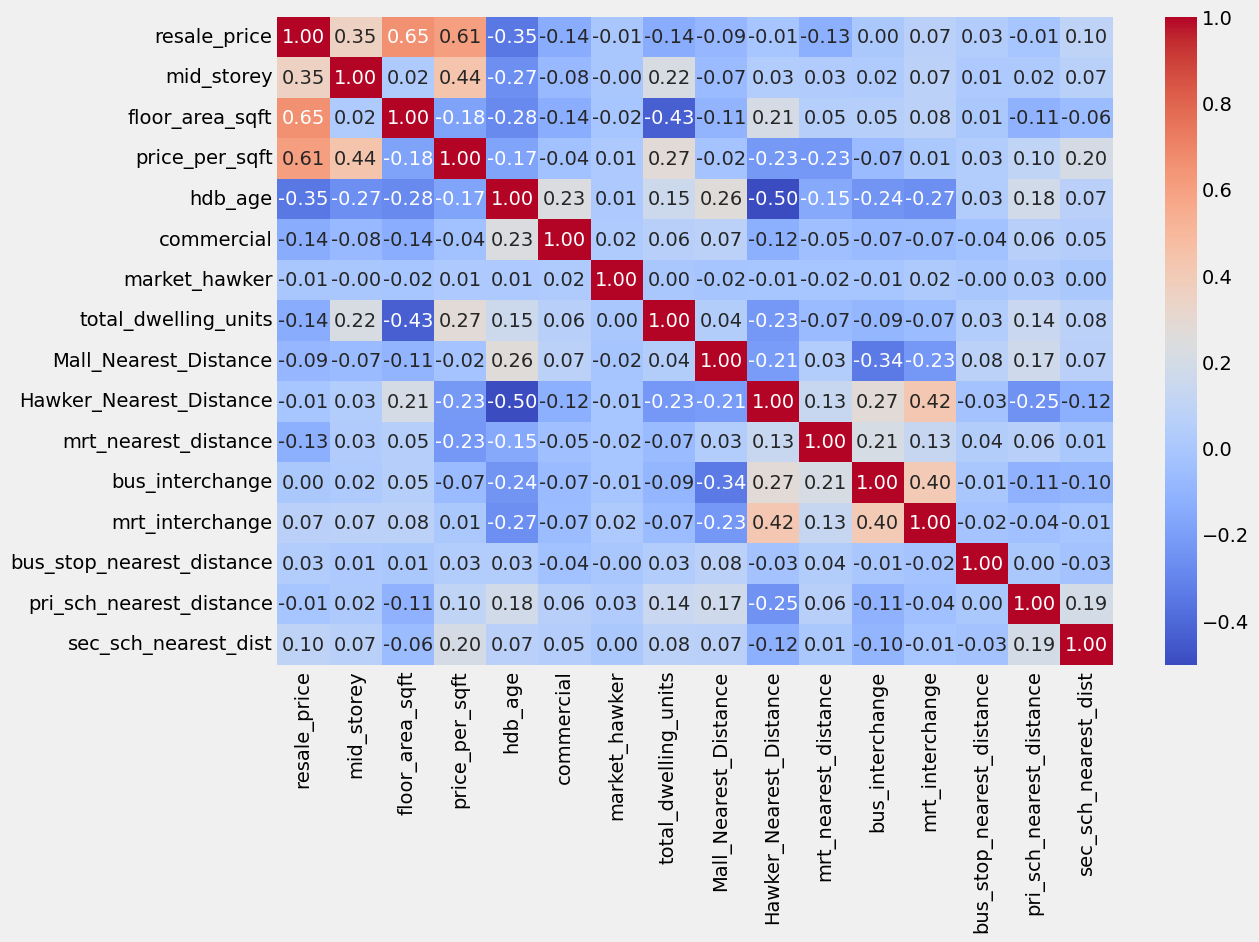

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_test.corr(numeric_only=True), fmt='.2f', cmap='coolwarm', annot=True)
plt.show()

### Selected numerical features:
- mid_storey
- floor_area_sqft
- hdb_age
- total_dwelling units
- mrt_nearest_distance

In [66]:
hdb_train.select_dtypes(include = 'object').head()

town  flat_type block       street_name storey_range  \
0  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD     10 TO 12   
1           BISHAN     5 ROOM   153      BISHAN ST 13     07 TO 09   
2      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25     13 TO 15   
3           BISHAN     4 ROOM   232      BISHAN ST 22     01 TO 05   
4           YISHUN     4 ROOM   876      YISHUN ST 81     01 TO 03   

   flat_model       full_flat_type  postal planning_area     mrt_name  \
0     Model A       4 ROOM Model A  382003       Kallang      Kallang   
1    Improved      5 ROOM Improved  570153        Bishan       Bishan   
2   Apartment  EXECUTIVE Apartment  651289   Bukit Batok  Bukit Batok   
3     Model A       4 ROOM Model A  570232        Bishan       Bishan   
4  Simplified    4 ROOM Simplified  760876        Yishun       Khatib   

                            pri_sch_name  \
0               Geylang Methodist School   
1  Kuo Chuan Presbyterian Primary School   
2                  Keming Primary School   
3                   Catholic High School   
4              Naval Base Primary School   

                              sec_sch_name  
0                 Geylang Methodist School  
1  Kuo Chuan Presbyterian Secondary School  
2             Yusof Ishak Secondary School  
3                     Catholic High School  
4             Orchid Park Secondary School

In [67]:
hdb_train.select_dtypes(include = 'object').nunique()

town                 26
flat_type             7
block              2514
street_name         553
storey_range         25
flat_model           20
full_flat_type       43
postal            17483
planning_area        32
mrt_name             94
pri_sch_name        177
sec_sch_name        134
dtype: int64

In [68]:
#create dummies for one-hot-encoding - flat_tyoe
hdb_train_dummies = pd.get_dummies(hdb_train.flat_type, prefix = 'flat_type')
hdb_train_dummies.drop(hdb_train_dummies.columns[0], axis = 1, inplace = True)

In [69]:
hdb_train_dummies = pd.concat([hdb_train["resale_price"],hdb_train_dummies], axis = 1)

In [70]:
hdb_train_dummies.head()

resale_price  flat_type_2 ROOM  flat_type_3 ROOM  flat_type_4 ROOM  \
0      680000.0             False             False              True   
1      665000.0             False             False             False   
2      838000.0             False             False             False   
3      550000.0             False             False              True   
4      298000.0             False             False              True   

   flat_type_5 ROOM  flat_type_EXECUTIVE  flat_type_MULTI-GENERATION  
0             False                False                       False  
1              True                False                       False  
2             False                 True                       False  
3             False                False                       False  
4             False                False                       False

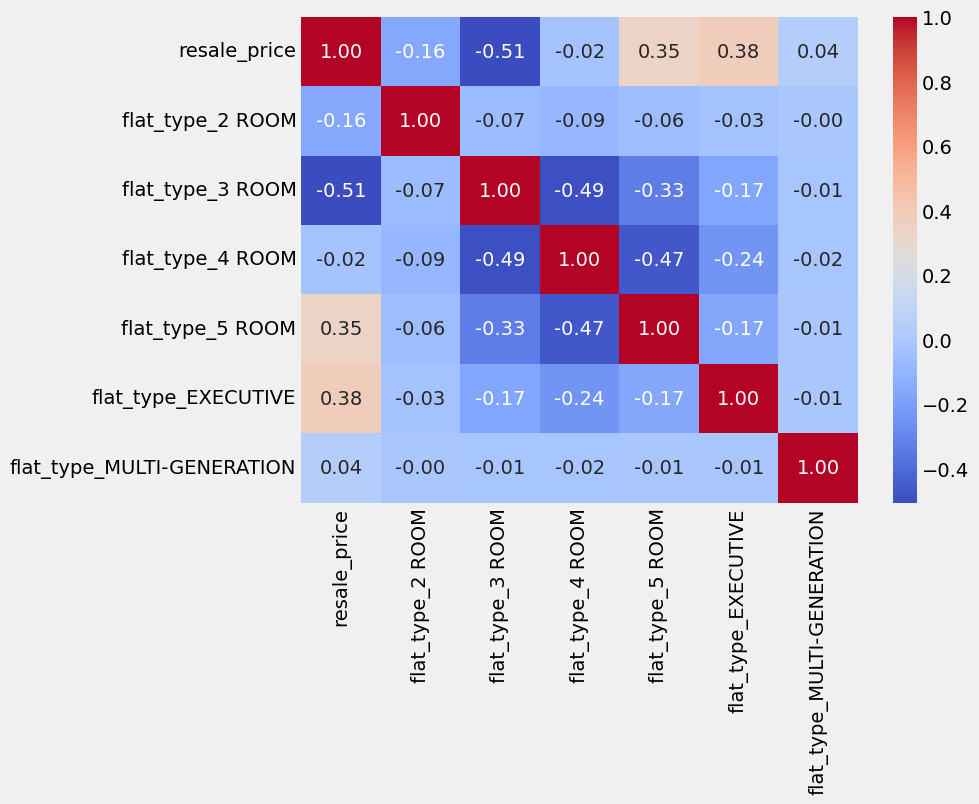

In [71]:
sns.heatmap(hdb_train_dummies.corr(), fmt='.2f', cmap='coolwarm', annot=True)
plt.show()

### Add a new feature to sort by zones

In [72]:
zones = pd.read_csv('./zones.csv')

In [73]:
    hdb_train = pd.merge(hdb_train,zones,how="left",left_on="town",right_on="LIST")

In [74]:
hdb_train["ZONE"].value_counts()

ZONE
OCR    122068
RCR     26948
CCR      1618
Name: count, dtype: int64

In [75]:
zone_dummies = pd.get_dummies(hdb_train.ZONE, prefix="zone")
# zone_dummies.drop(zone_dummies.columns[0],axis = 1, inplace=True)

In [76]:
zone_dummies.head()

zone_CCR  zone_OCR  zone_RCR
0     False     False      True
1     False     False      True
2     False      True     False
3     False     False      True
4     False      True     False

In [77]:
#test for collinearity

zone_test = pd.concat([hdb_train["resale_price"], zone_dummies], axis=1)

zone_test.head()

resale_price  zone_CCR  zone_OCR  zone_RCR
0      680000.0     False     False      True
1      665000.0     False     False      True
2      838000.0     False      True     False
3      550000.0     False     False      True
4      298000.0     False      True     False

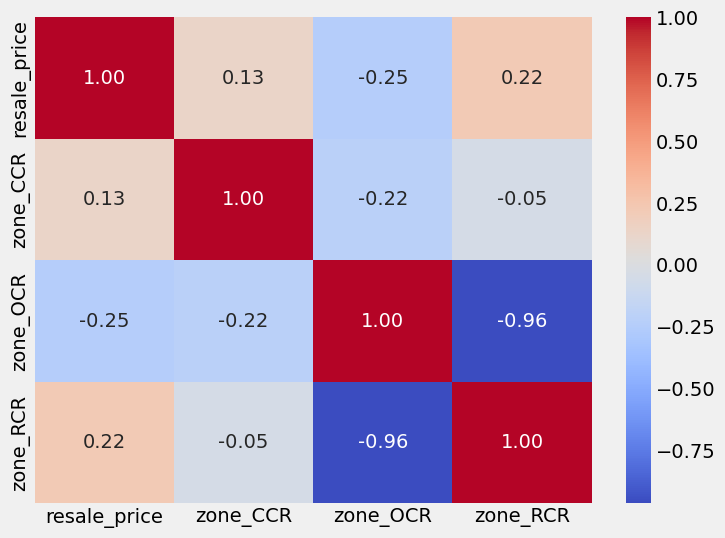

In [78]:
sns.heatmap(zone_test.corr(), fmt='.2f', cmap='coolwarm', annot=True)
plt.show()

In [79]:
#keep zone as feature

In [80]:
hdb_train.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471      2016-05-01  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598      2012-07-01           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897      2013-07-01      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070      2012-04-01           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632      2017-12-01           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  flat_model lease_commence_date  resale_price  mid_storey  \
0     10 TO 12     Model A          2006-01-01      680000.0          11   
1     07 TO 09    Improved          1987-01-01      665000.0           8   
2     13 TO 15   Apartment          1997-01-01      838000.0          14   
3     01 TO 05     Model A          1992-01-01      550000.0           3   
4     01 TO 03  Simplified          1987-01-01      298000.0           2   

        full_flat_type  floor_area_sqft  price_per_sqft  hdb_age  commercial  \
0       4 ROOM Model A          968.760      701.928238       15       False   
1      5 ROOM Improved         1399.320      475.230826       34       False   
2  EXECUTIVE Apartment         1550.016      540.639580       24       False   
3       4 ROOM Model A         1108.692      496.080066       29        True   
4    4 ROOM Simplified          893.412      333.552717       34       False   

   market_hawker  total_dwelling_units  postal  Latitude   Longitude  \
0          False                   142  382003  1.314299  103.872828   
1          False                   112  570153  1.346086  103.855078   
2          False                    90  651289  1.343867  103.760535   
3          False                    75  570232  1.358245  103.845504   
4          False                    48  760876  1.414745  103.835532   

  planning_area  Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  \
0       Kallang            1094.090418               0.0              0.0   
1        Bishan             866.941448               0.0              1.0   
2   Bukit Batok            1459.579948               0.0              0.0   
3        Bishan             950.175199               0.0              1.0   
4        Yishun             729.771895               0.0              1.0   

   Mall_Within_2km  Hawker_Nearest_Distance  Hawker_Within_500m  \
0              7.0               154.753357                 1.0   
1              3.0               640.151925                 0.0   
2              4.0              1762.082341                 0.0   
3              4.0               726.215262                 0.0   
4              2.0              1540.151439                 0.0   

   Hawker_Within_1km  Hawker_Within_2km  mrt_nearest_distance     mrt_name  \
0                3.0               13.0            330.083069      Kallang   
1                1.0                7.0            903.659703       Bishan   
2                0.0                1.0           1334.251197  Bukit Batok   
3                1.0                9.0            907.453484       Bishan   
4                0.0                1.0            412.343032       Khatib   

   bus_interchange  mrt_interchange  mrt_latitude  mrt_longitude  \
0            False            False      1.311540     103.871731   
1             True             True      1.350580     103.848305   
2             True            False      1.349561     103.749970   
3             True             True      1.350580     103.848305   
4            False            False      1.417131     103.832692   

   bus_stop_nearest_distance  bus_stop_latitude  bus_stop_longitude  \
0                  29.427395           1.314433          103.872600   
1                  58.207761           1.345659          103.855381   
2                 214.747860           1.344064          103.758613   
3                  43.396521           1.358045          103.845169   
4                 129.422752           1.415424   

In [81]:
#shortlist: town, flat_type

#remove postal, planning_area, block, full_flat_type, mrt_name, pri_sch_name, sec_sch_name, street_name, 

In [82]:
hdb_train.dtypes

id                                    int64
Tranc_YearMonth              datetime64[ns]
town                                 object
flat_type                            object
block                                object
street_name                          object
storey_range                         object
flat_model                           object
lease_commence_date          datetime64[ns]
resale_price                        float64
mid_storey                            int64
full_flat_type                       object
floor_area_sqft                     float64
price_per_sqft                      float64
hdb_age                               int64
commercial                             bool
market_hawker                          bool
total_dwelling_units                  int64
postal                               object
Latitude                            float64
Longitude                           float64
planning_area                        object
Mall_Nearest_Distance           

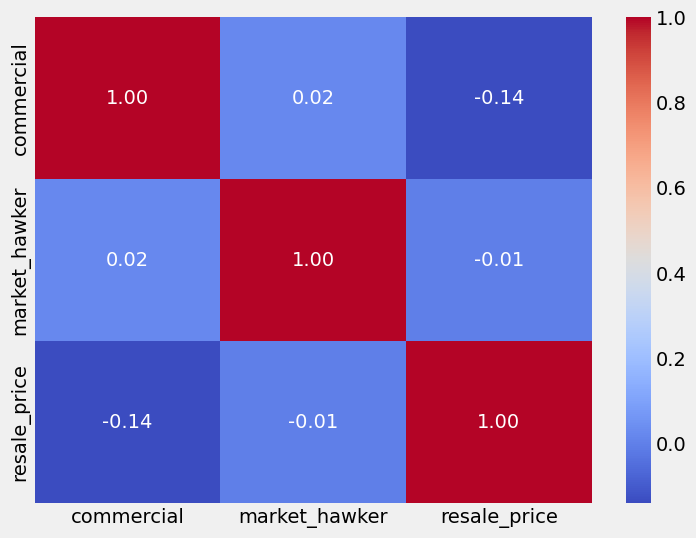

In [83]:
cols = ["commercial", "market_hawker", "resale_price"]

sns.heatmap(hdb_train[cols].corr(),fmt='.2f', cmap='coolwarm', annot=True)
plt.show()

In [84]:
hdb_train.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471      2016-05-01  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598      2012-07-01           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897      2013-07-01      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070      2012-04-01           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632      2017-12-01           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  flat_model lease_commence_date  resale_price  mid_storey  \
0     10 TO 12     Model A          2006-01-01      680000.0          11   
1     07 TO 09    Improved          1987-01-01      665000.0           8   
2     13 TO 15   Apartment          1997-01-01      838000.0          14   
3     01 TO 05     Model A          1992-01-01      550000.0           3   
4     01 TO 03  Simplified          1987-01-01      298000.0           2   

        full_flat_type  floor_area_sqft  price_per_sqft  hdb_age  commercial  \
0       4 ROOM Model A          968.760      701.928238       15       False   
1      5 ROOM Improved         1399.320      475.230826       34       False   
2  EXECUTIVE Apartment         1550.016      540.639580       24       False   
3       4 ROOM Model A         1108.692      496.080066       29        True   
4    4 ROOM Simplified          893.412      333.552717       34       False   

   market_hawker  total_dwelling_units  postal  Latitude   Longitude  \
0          False                   142  382003  1.314299  103.872828   
1          False                   112  570153  1.346086  103.855078   
2          False                    90  651289  1.343867  103.760535   
3          False                    75  570232  1.358245  103.845504   
4          False                    48  760876  1.414745  103.835532   

  planning_area  Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  \
0       Kallang            1094.090418               0.0              0.0   
1        Bishan             866.941448               0.0              1.0   
2   Bukit Batok            1459.579948               0.0              0.0   
3        Bishan             950.175199               0.0              1.0   
4        Yishun             729.771895               0.0              1.0   

   Mall_Within_2km  Hawker_Nearest_Distance  Hawker_Within_500m  \
0              7.0               154.753357                 1.0   
1              3.0               640.151925                 0.0   
2              4.0              1762.082341                 0.0   
3              4.0               726.215262                 0.0   
4              2.0              1540.151439                 0.0   

   Hawker_Within_1km  Hawker_Within_2km  mrt_nearest_distance     mrt_name  \
0                3.0               13.0            330.083069      Kallang   
1                1.0                7.0            903.659703       Bishan   
2                0.0                1.0           1334.251197  Bukit Batok   
3                1.0                9.0            907.453484       Bishan   
4                0.0                1.0            412.343032       Khatib   

   bus_interchange  mrt_interchange  mrt_latitude  mrt_longitude  \
0            False            False      1.311540     103.871731   
1             True             True      1.350580     103.848305   
2             True            False      1.349561     103.749970   
3             True             True      1.350580     103.848305   
4            False            False      1.417131     103.832692   

   bus_stop_nearest_distance  bus_stop_latitude  bus_stop_longitude  \
0                  29.427395           1.314433          103.872600   
1                  58.207761           1.345659          103.855381   
2                 214.747860           1.344064          103.758613   
3                  43.396521           1.358045          103.845169   
4                 129.422752           1.415424   

## 10. Distribution of data

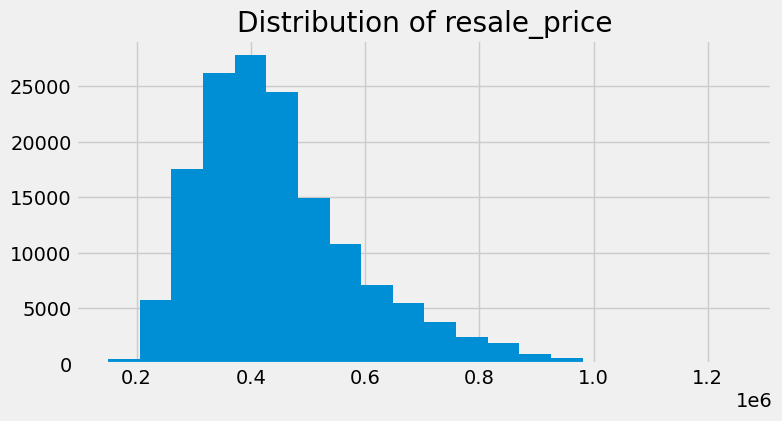

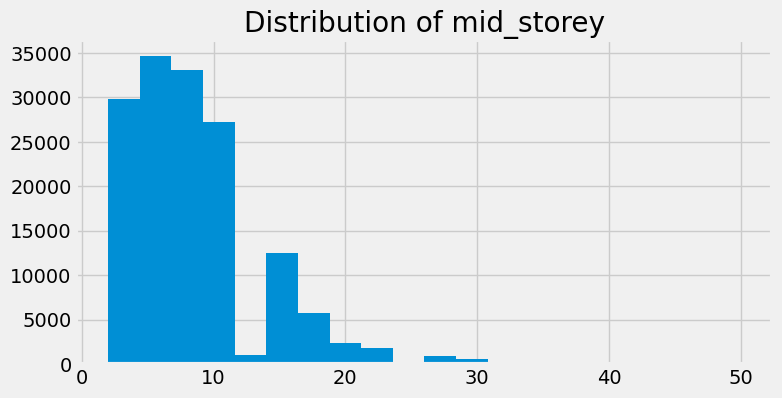

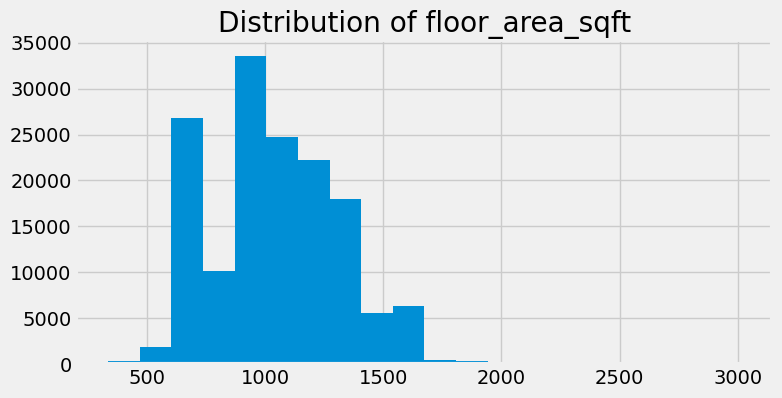

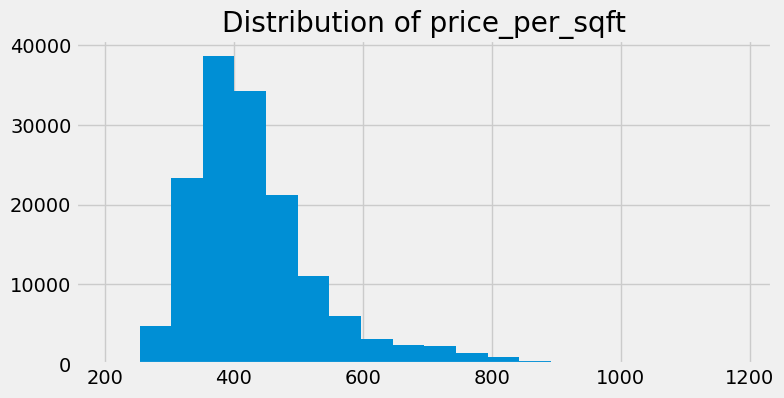

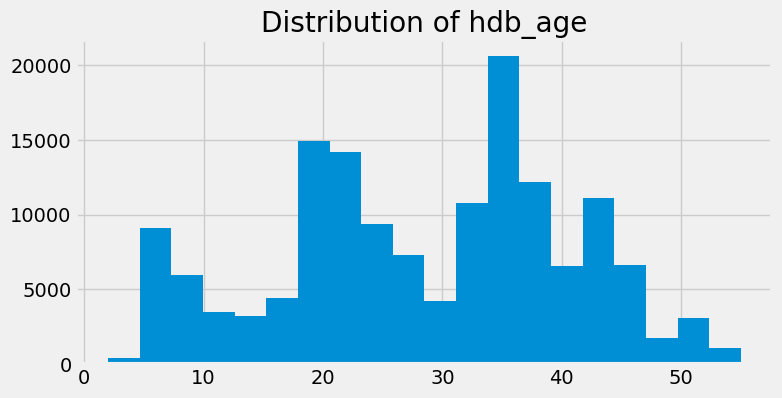

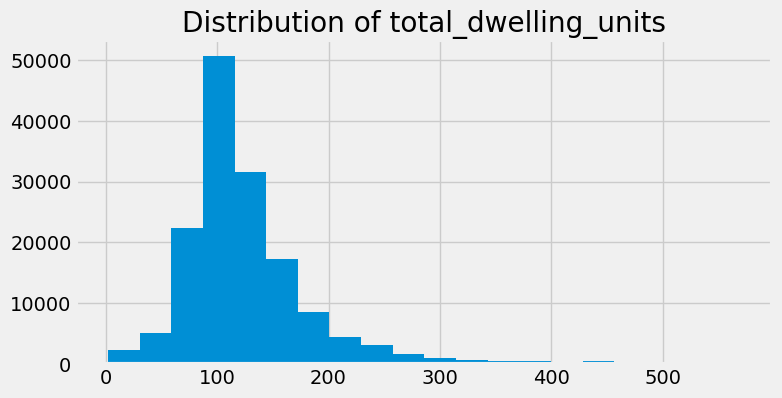

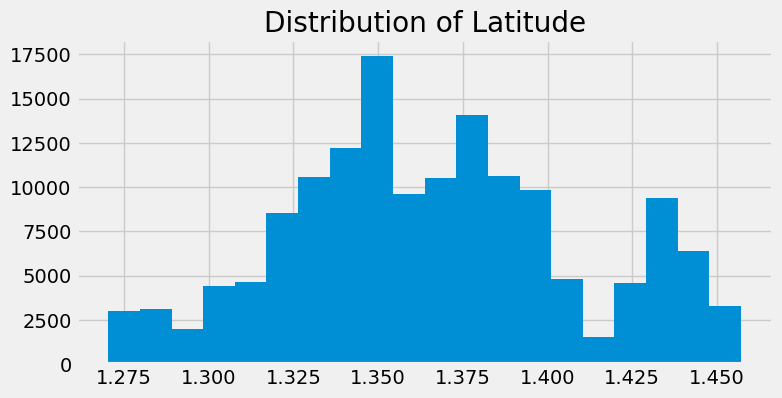

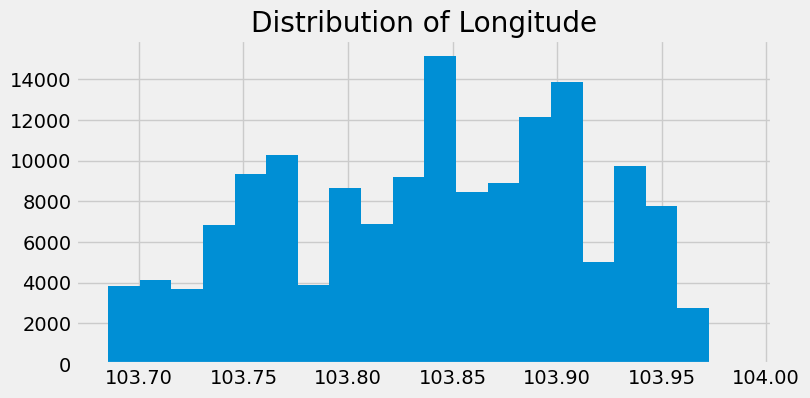

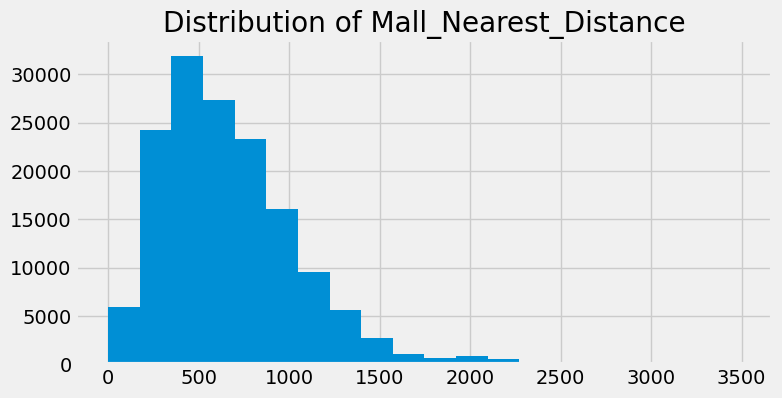

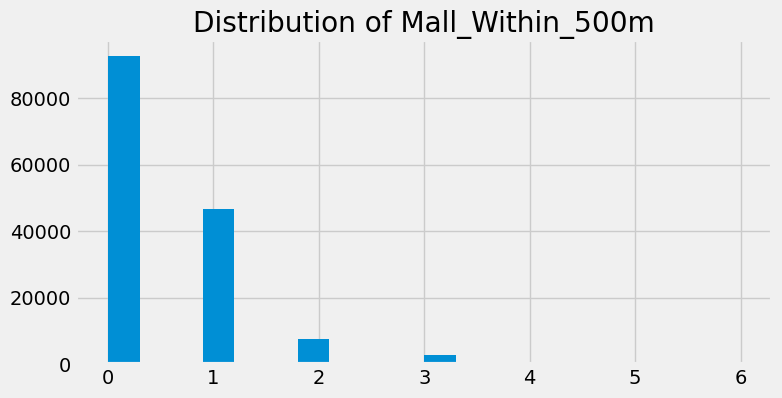

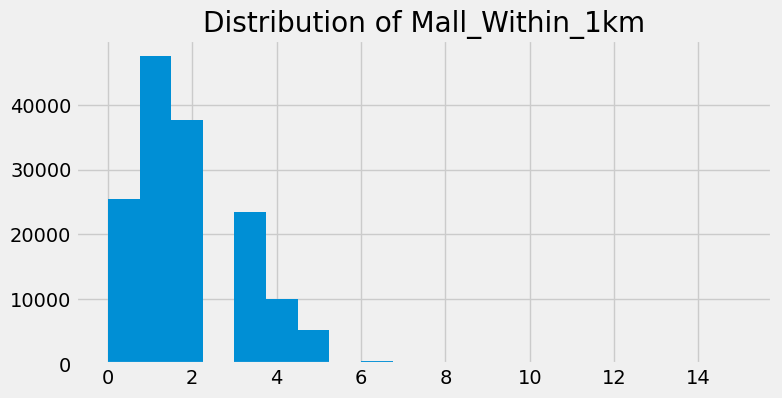

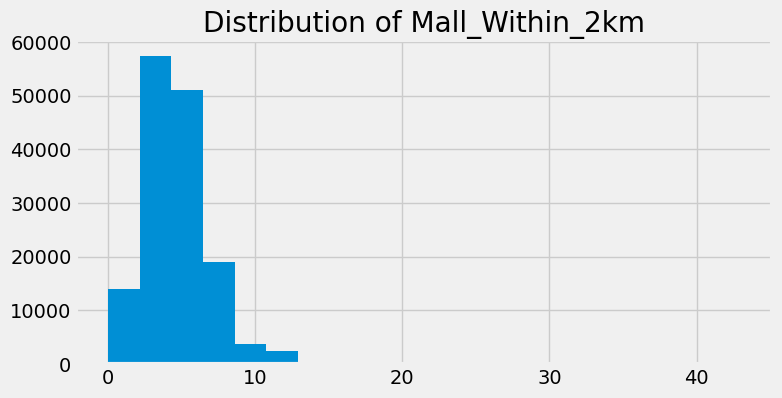

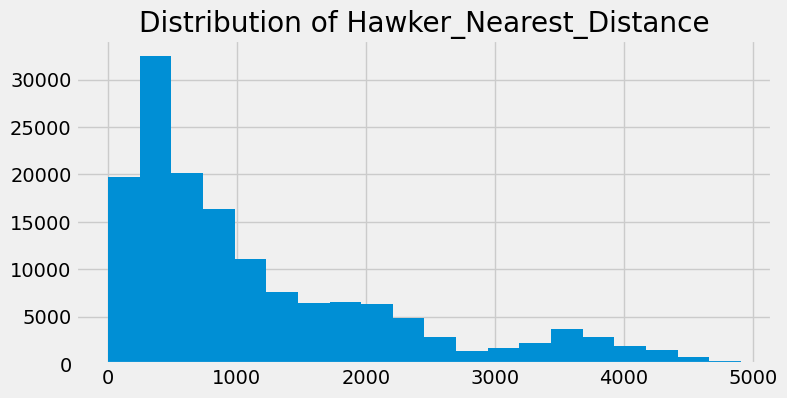

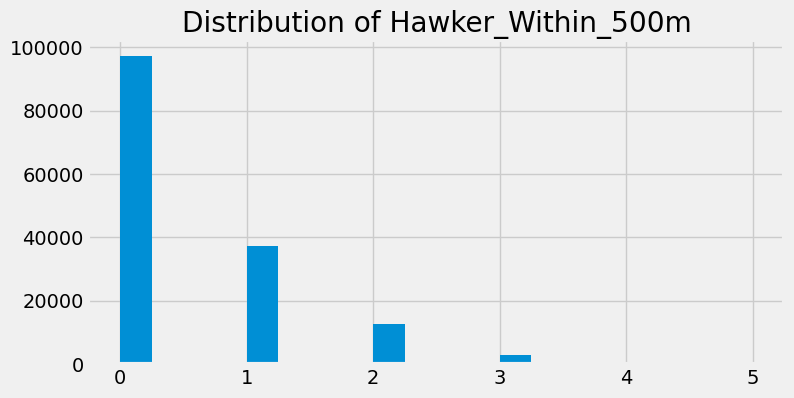

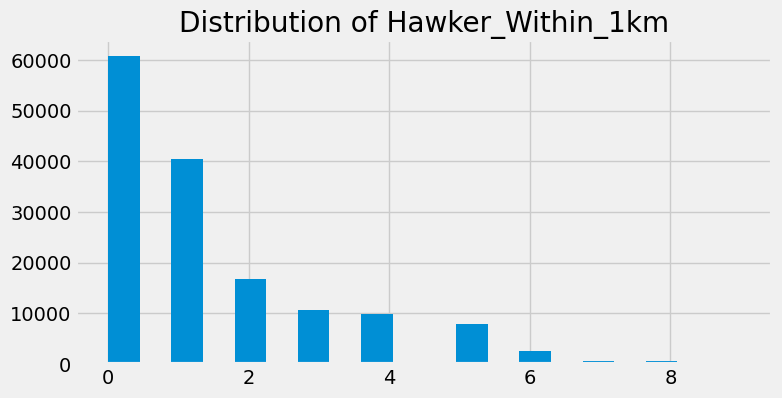

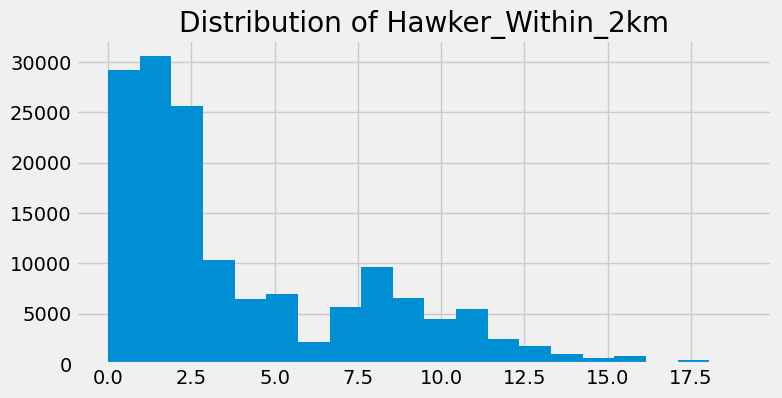

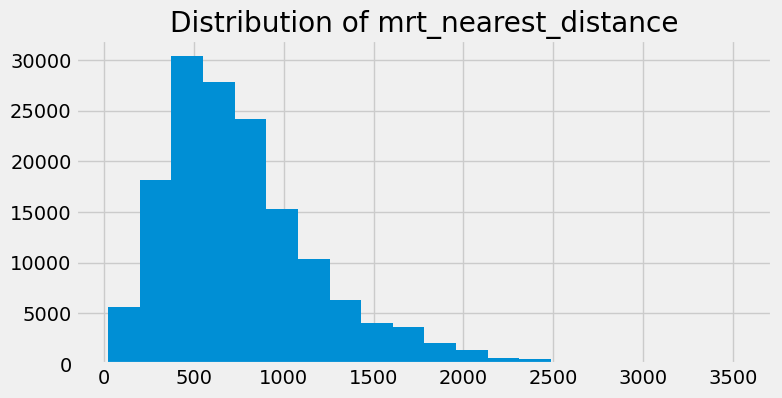

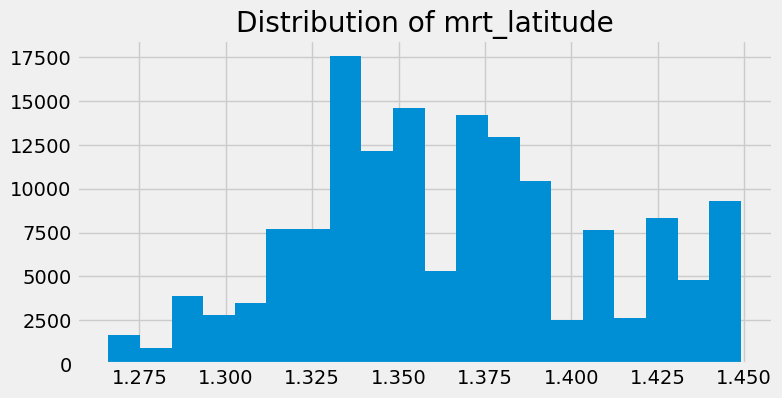

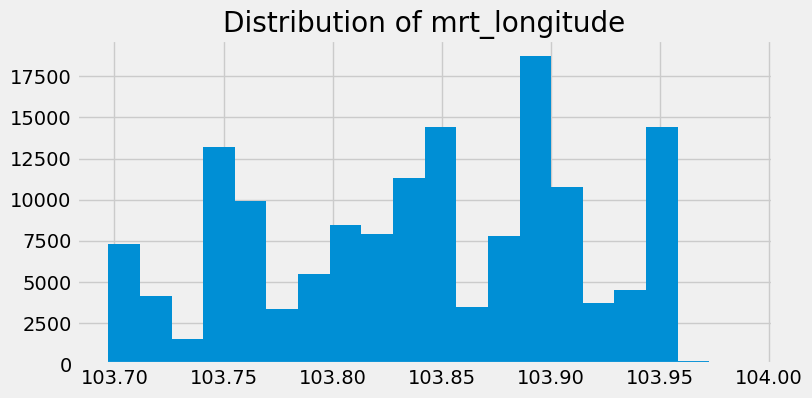

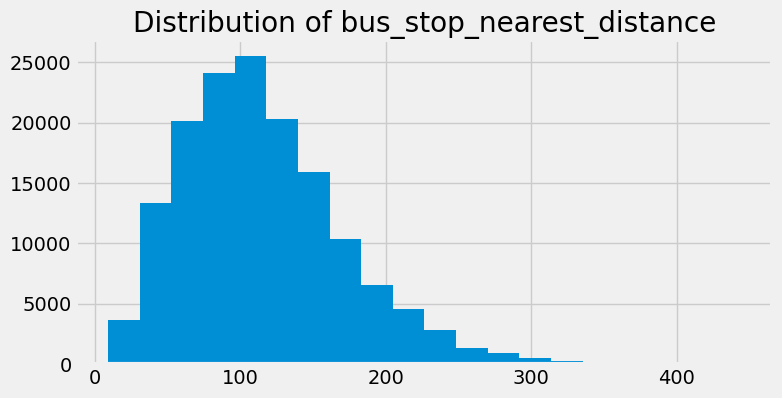

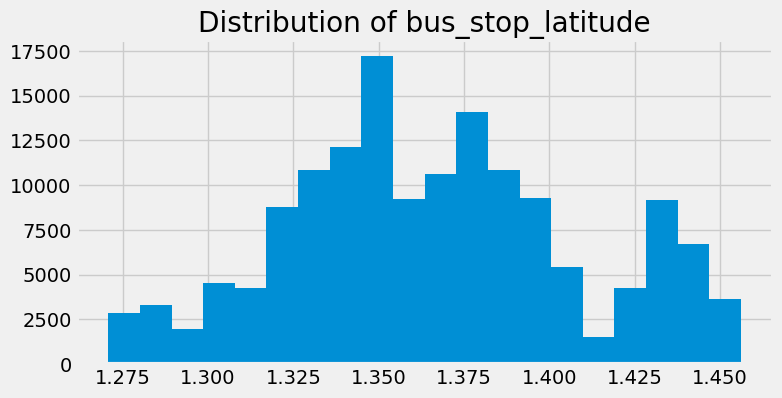

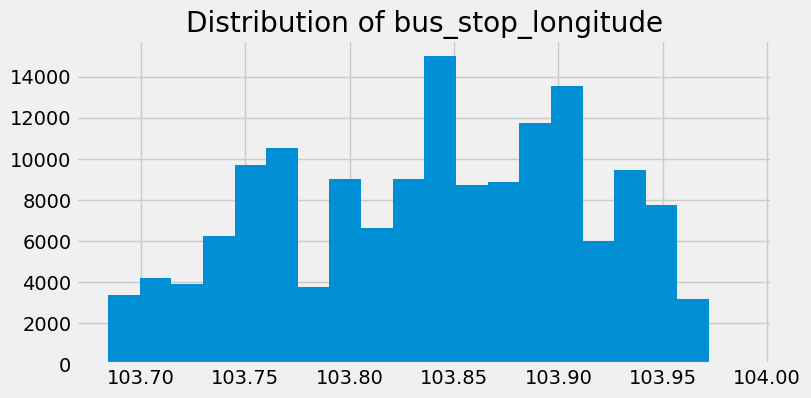

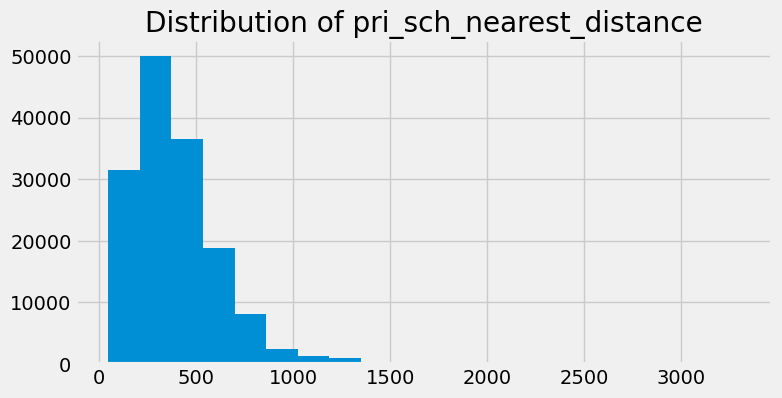

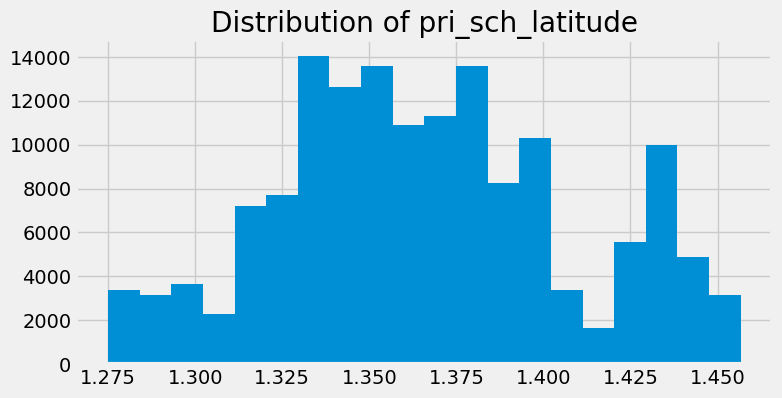

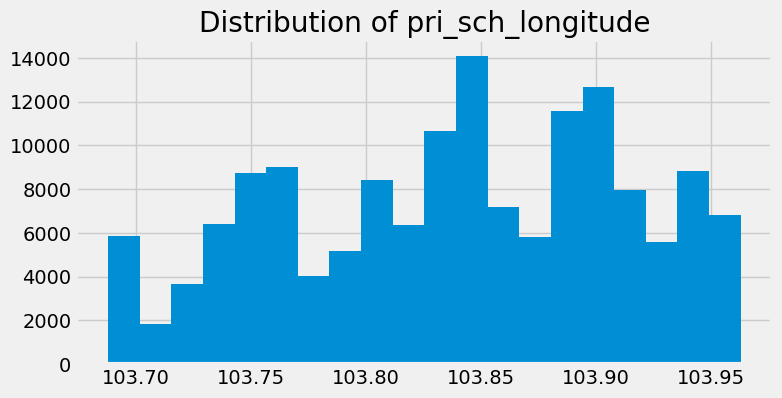

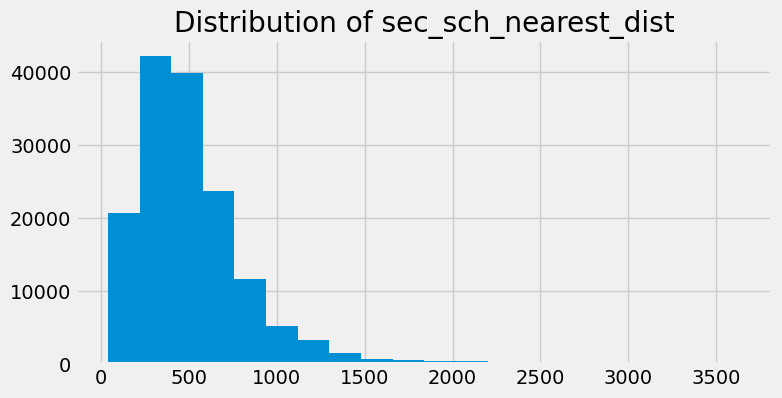

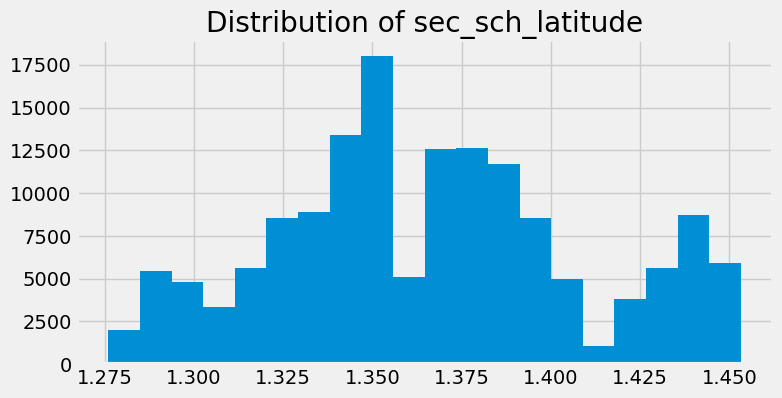

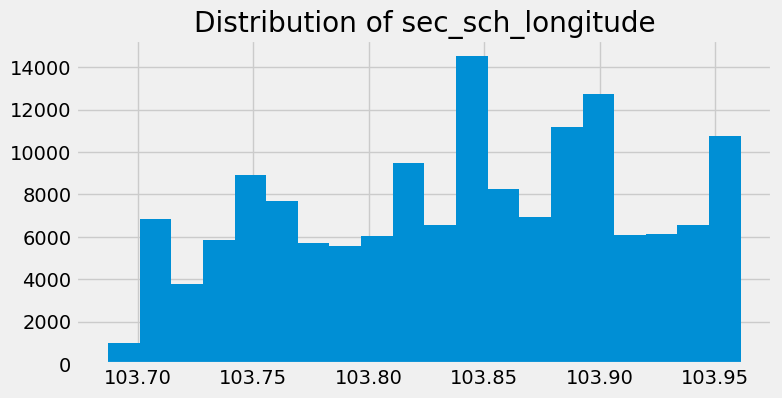

In [85]:
for col in hdb_num_cols:
    hdb_train[col].hist(figsize=(8, 4),bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

## 11. Grouped Analysis

<Axes: title={'center': 'average resale price by town'}, xlabel='town'>

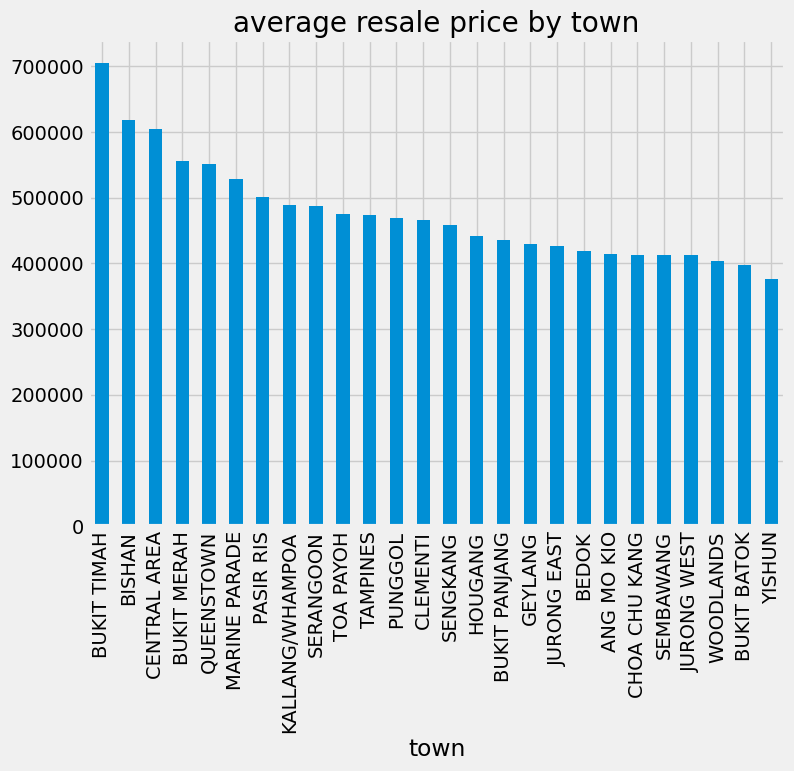

In [86]:
#town vs resale price
hdb_train.groupby("town")["resale_price"].mean().sort_values(ascending=False).plot(kind='bar',x='town',y='resale_price',title="average resale price by town")

<Axes: title={'center': 'average resale price by flat type'}, xlabel='flat_type'>

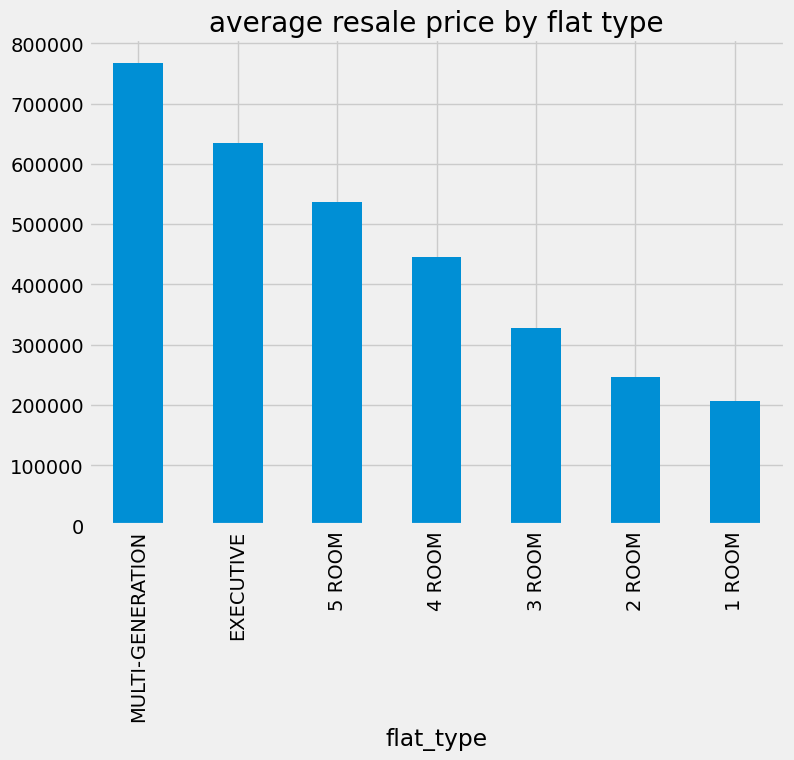

In [87]:
#flat type vs resale price
hdb_train.groupby("flat_type")["resale_price"].mean().sort_values(ascending=False).plot(kind='bar',title="average resale price by flat type")

<Axes: title={'center': 'average resale price by zone'}, xlabel='ZONE'>

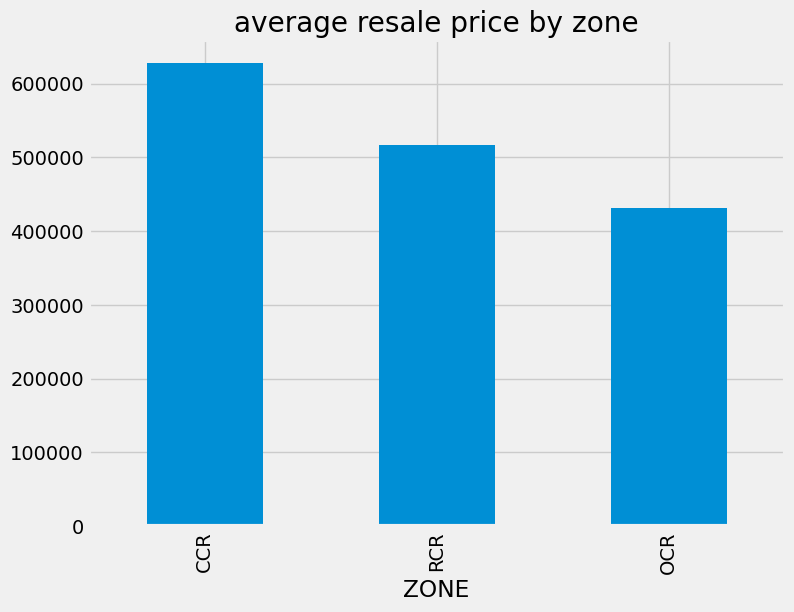

In [88]:
#zone vs resale prices
hdb_train.groupby("ZONE")["resale_price"].mean().sort_values(ascending=False).plot(kind='bar',title="average resale price by zone")

In [89]:
hdb_train["flat_type"].sort_values(ascending = True).unique().tolist()

['1 ROOM',
 '2 ROOM',
 '3 ROOM',
 '4 ROOM',
 '5 ROOM',
 'EXECUTIVE',
 'MULTI-GENERATION']

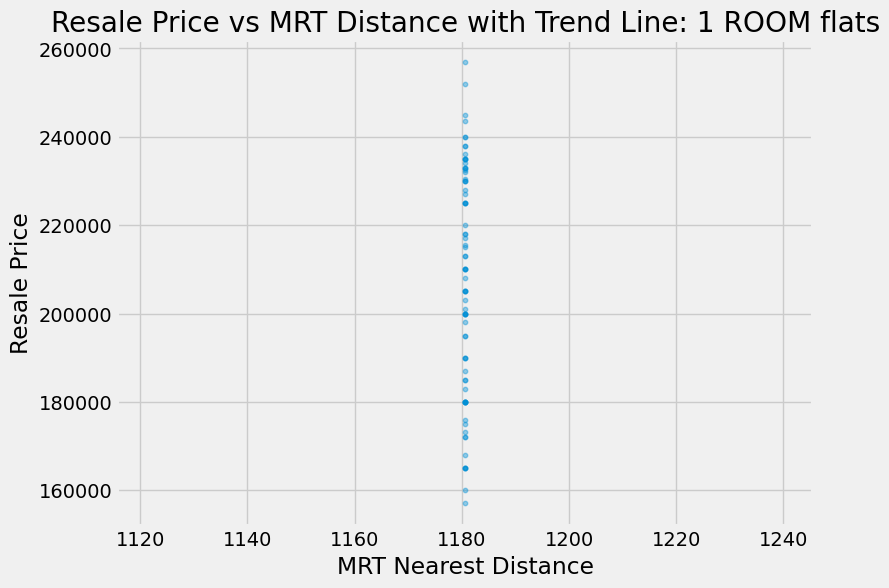

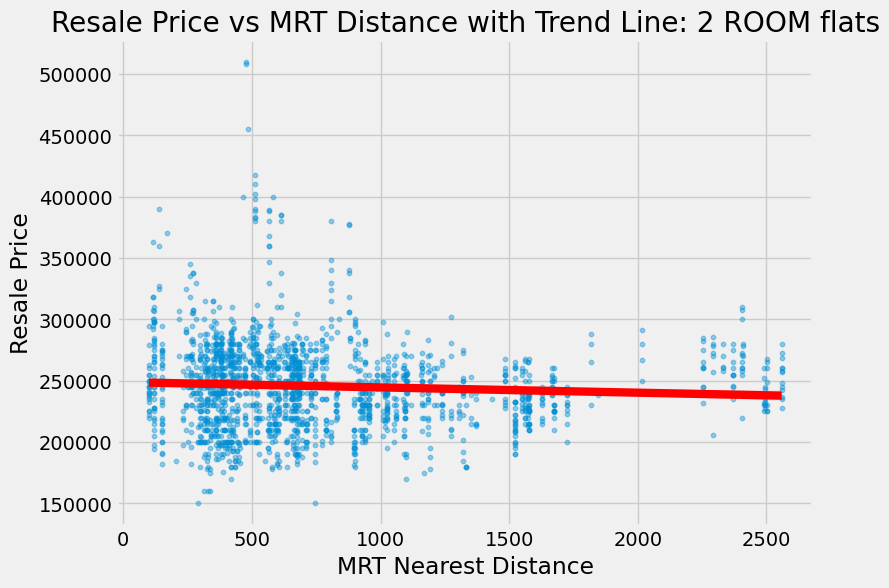

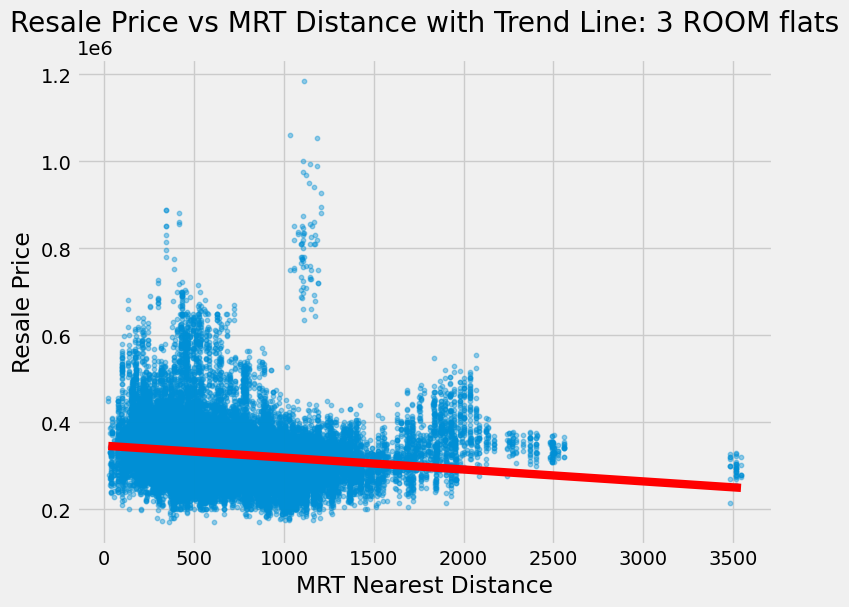

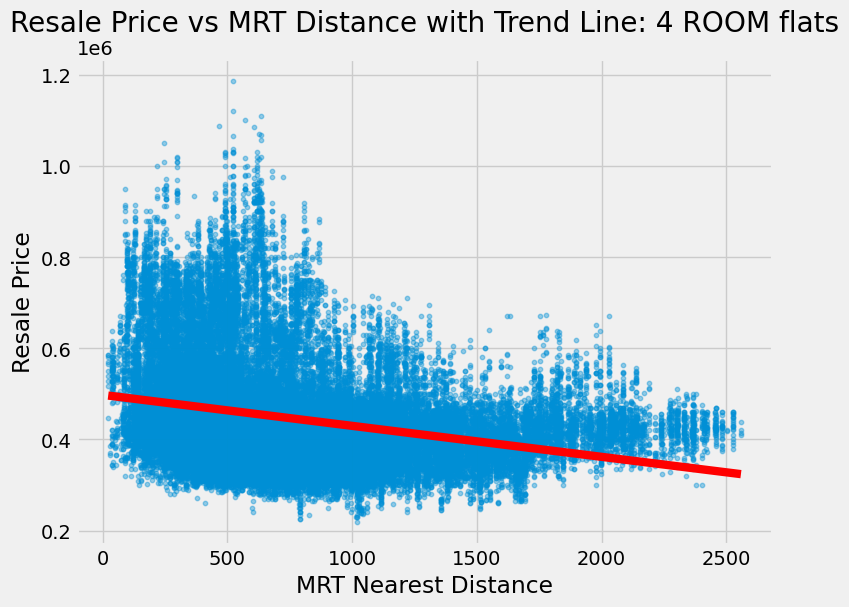

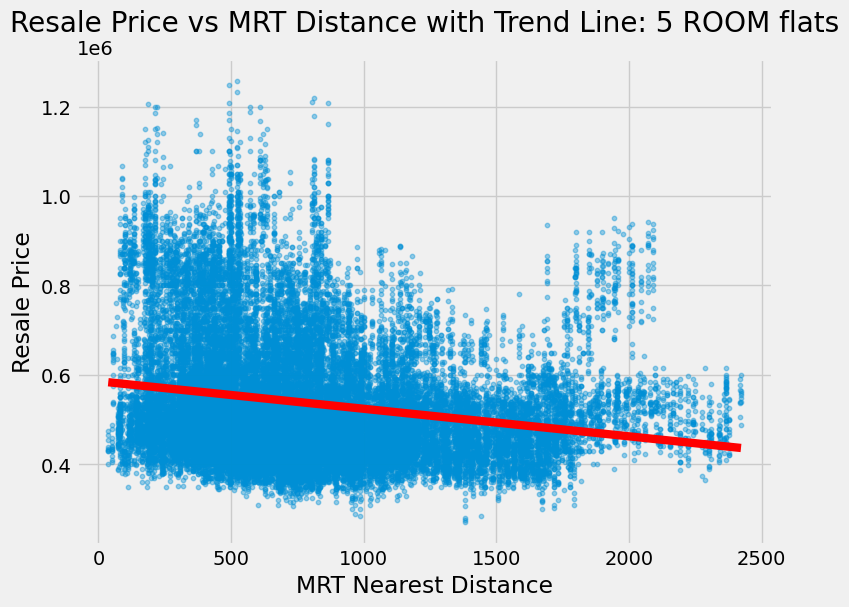

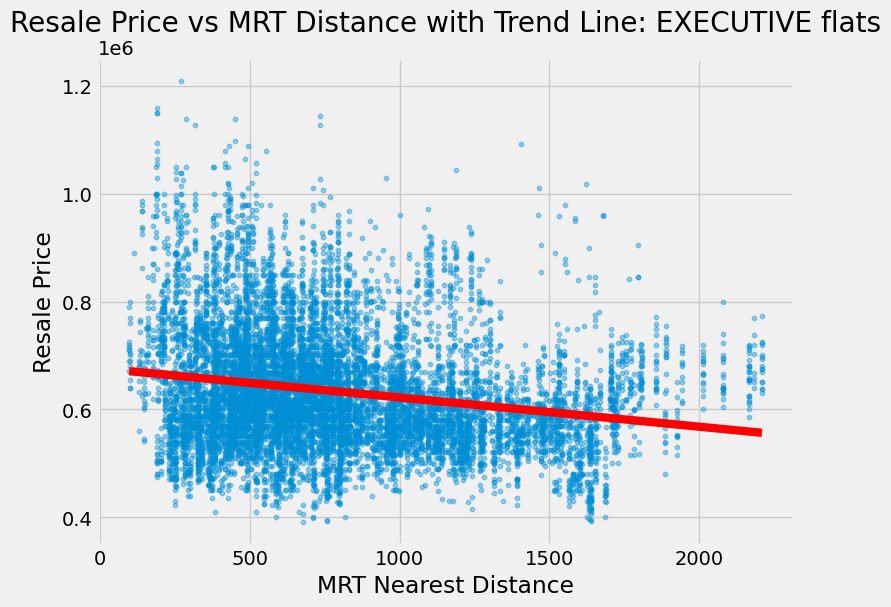

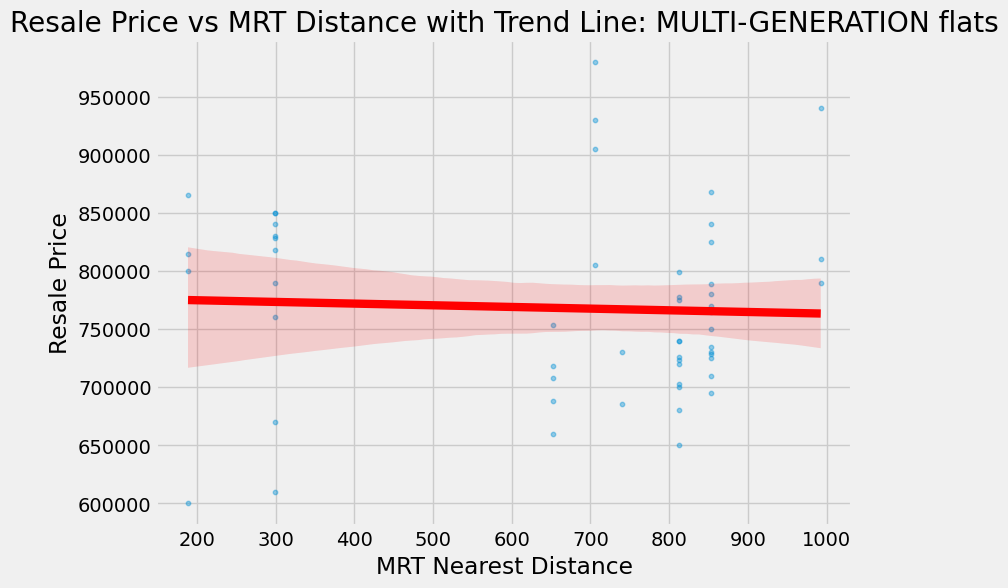

In [90]:
for flat_type in hdb_train["flat_type"].sort_values(ascending = True).unique().tolist():
    sns.regplot(
        data=hdb_train[hdb_train["flat_type"] == flat_type],
        x='mrt_nearest_distance',
        y='resale_price',
        scatter_kws={'alpha':0.4, 's':10},
        line_kws={'color':'red'}
        )
    plt.title(f"Resale Price vs MRT Distance with Trend Line: {flat_type} flats")
    plt.xlabel("MRT Nearest Distance")
    plt.ylabel("Resale Price")
    plt.show()

In [91]:
cols = ["resale_price", "town", "flat_type", "ZONE", "mid_storey", "floor_area_sqft", "hdb_age", "total_dwelling_units", "mrt_nearest_distance"]

hdb_train_clean = hdb_train[cols]

## Export cleaned data for modelling

In [92]:
hdb_train_clean.to_csv('hdb_data_clean.csv')